In [561]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
%matplotlib inline

# **Import Data From UCI ML repository**

In [562]:
pip install ucimlrepo

In [563]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
hepatitis = fetch_ucirepo(id=46)

# data (as pandas dataframes)
X = hepatitis.data.features
y = hepatitis.data.targets

X.head()

,Age,Sex,Steroid,Antivirals,Fatigue,Malaise,Anorexia,Liver Big,Liver Firm,Spleen Palpable,Spiders,Ascites,Varices,Bilirubin,Alk Phosphate,Sgot,Albumin,Protime,Histology
0,30,2,1.0,2,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,85.0,18.0,4.0,NaN,1
1,50,1,1.0,2,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,0.9,135.0,42.0,3.5,NaN,1
2,78,1,2.0,2,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.7,96.0,32.0,4.0,NaN,1
3,31,1,NaN,1,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.7,46.0,52.0,4.0,80.0,1
4,34,1,2.0,2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,NaN,200.0,4.0,NaN,1


In [564]:
X.tail()

,Age,Sex,Steroid,Antivirals,Fatigue,Malaise,Anorexia,Liver Big,Liver Firm,Spleen Palpable,Spiders,Ascites,Varices,Bilirubin,Alk Phosphate,Sgot,Albumin,Protime,Histology
150,46,1,2.0,2,1.0,1.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,7.6,NaN,242.0,3.3,50.0,2
151,44,1,2.0,2,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,0.9,126.0,142.0,4.3,NaN,2
152,61,1,1.0,2,1.0,1.0,2.0,1.0,1.0,2.0,1.0,2.0,2.0,0.8,75.0,20.0,4.1,NaN,2
153,53,2,1.0,2,1.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,1.5,81.0,19.0,4.1,48.0,2
154,43,1,2.0,2,1.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,2.0,1.2,100.0,19.0,3.1,42.0,2


In [565]:
y.head()

,Class
0,2
1,2
2,2
3,2
4,2


In [566]:
y.tail()

,Class
150,1
151,2
152,2
153,2
154,1


# **Checking duplicate**

In [567]:
duplicate_rows = X[X.duplicated()]

In [568]:
if duplicate_rows.shape[0] == 0:
    print("No duplicate rows found.")
else:
    print("Duplicate rows found.")

No duplicate rows found.


# **Null Count**

In [569]:
X.isnull().sum()

,0
Age,0
Sex,0
Steroid,1
Antivirals,0
Fatigue,1
Malaise,1
Anorexia,1
Liver Big,10
Liver Firm,11
Spleen Palpable,5


<Axes: >

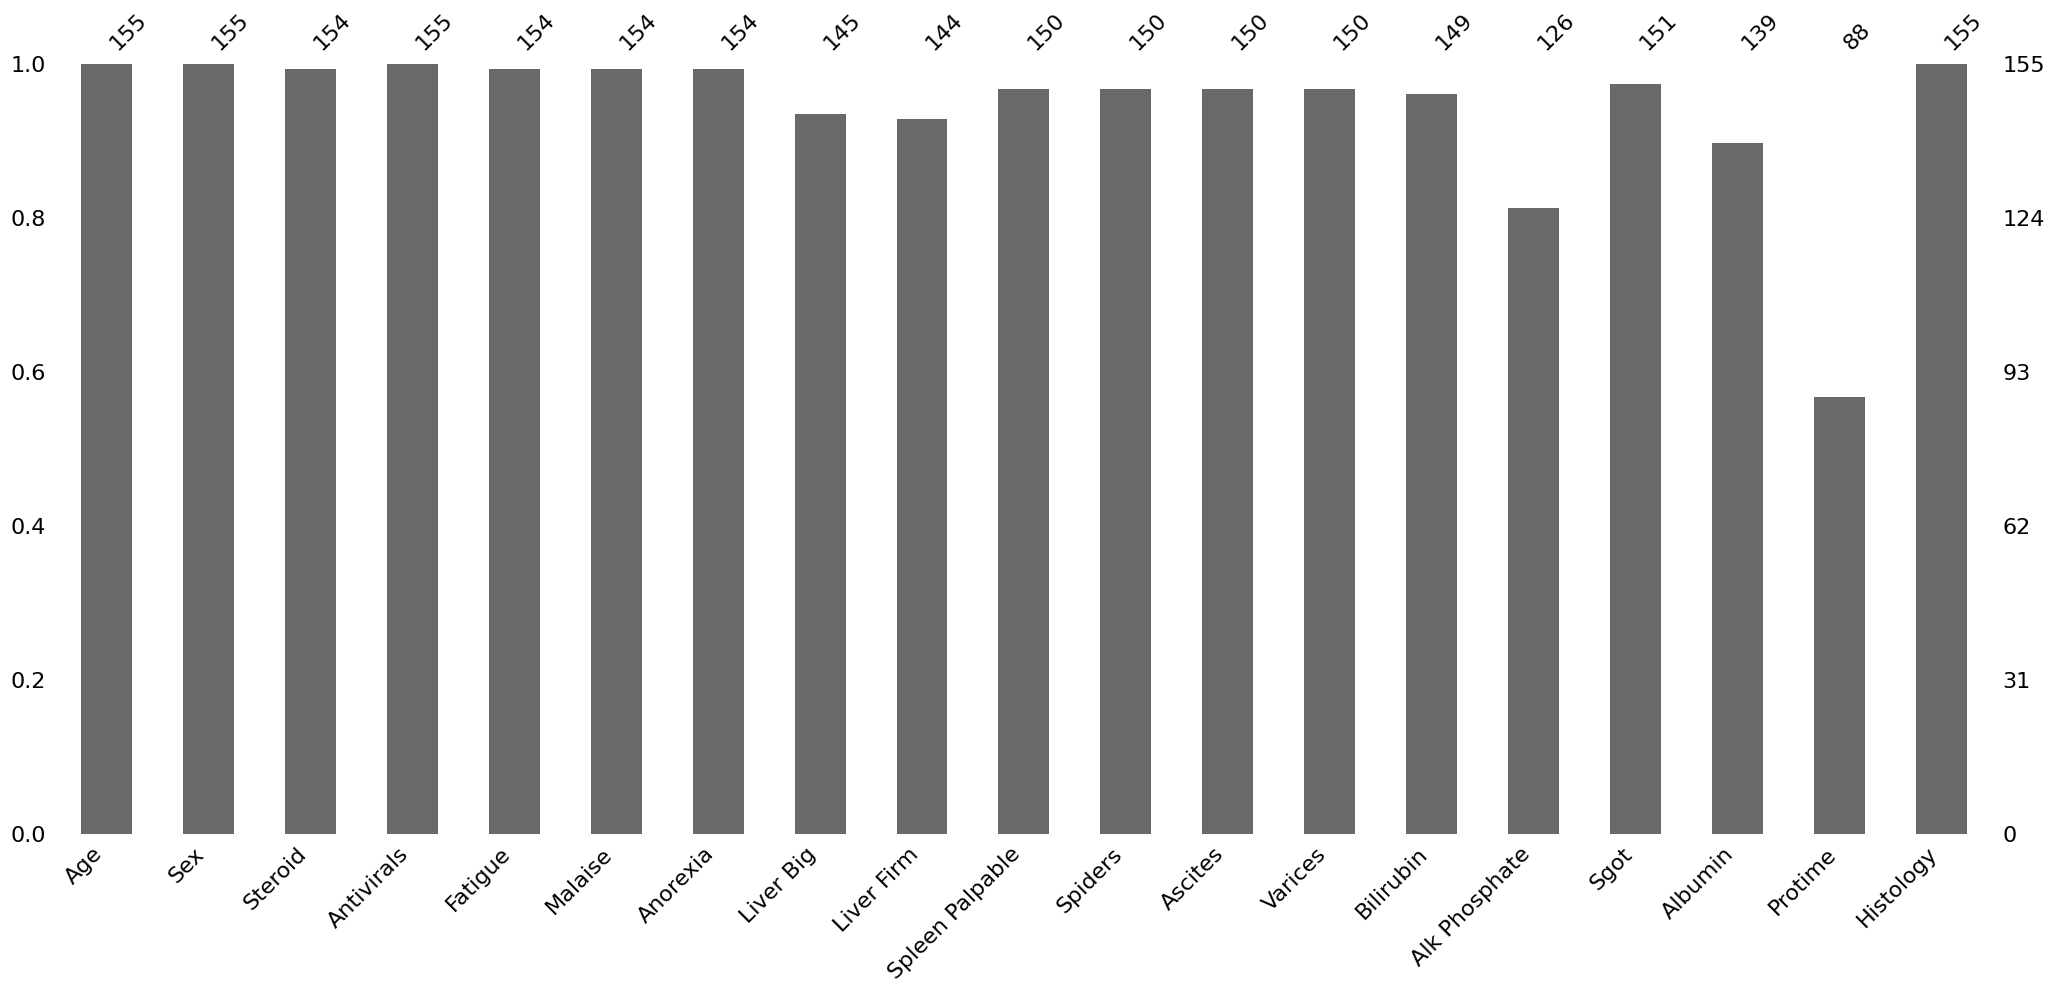

In [570]:
msno.bar(X)

In [571]:
missing_values_sum = X.isnull().sum().sum()

print(f'Total missing values: {missing_values_sum}')

Total missing values: 167


# **Numerical Data**

Text(0.5, 1.05, 'Missing: 0.00%')

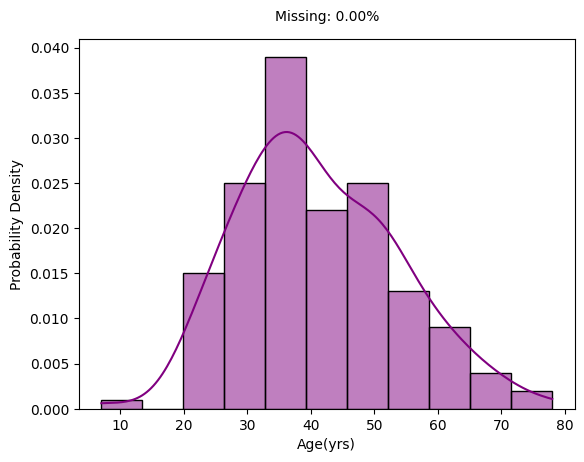

In [572]:
import seaborn as sns
# Age
ax = sns.histplot(X["Age"], kde = True, stat="density", color = 'purple')
plt.xlabel('Age(yrs)')
plt.ylabel('Probability Density')
#plt.xticks(range(0, 101, 10))
missing_percentage = X['Age'].isnull().mean() * 100
ax.annotate(f'Missing: {missing_percentage:.2f}%', xy = (0.5, 1.05), xycoords = 'axes fraction', ha = 'center')

Text(0.5, 1.05, 'Missing: 3.87%')

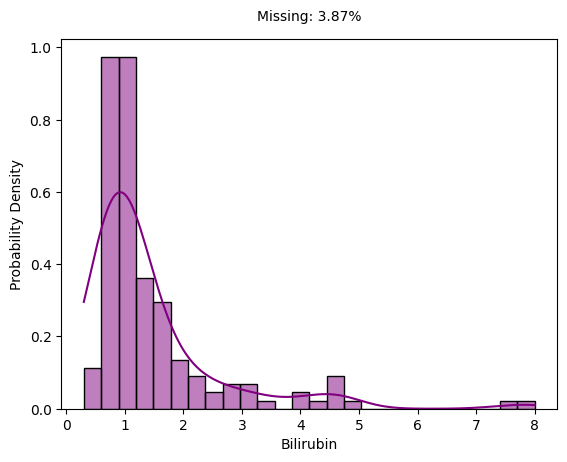

In [573]:
# Bilirubin
ax = sns.histplot(X["Bilirubin"], kde = True, stat = "density", color = 'purple')
plt.xlabel('Bilirubin')
plt.ylabel('Probability Density')
missing_percentage = X['Bilirubin'].isnull().mean() * 100
ax.annotate(f'Missing: {missing_percentage:.2f}%', xy = (0.5, 1.05), xycoords = 'axes fraction', ha = 'center')

Text(0.5, 1.05, 'Missing: 18.71%')

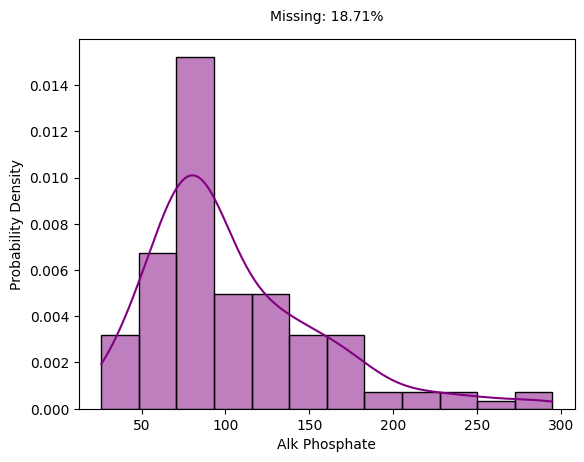

In [574]:
# Alk Phosphate
ax = sns.histplot(X["Alk Phosphate"], kde = True, stat = "density", color = 'purple')
plt.xlabel('Alk Phosphate')
plt.ylabel('Probability Density')
missing_percentage = X['Alk Phosphate'].isnull().mean() * 100
ax.annotate(f'Missing: {missing_percentage:.2f}%', xy = (0.5, 1.05), xycoords = 'axes fraction', ha = 'center')

Text(0.5, 1.05, 'Missing: 2.58%')

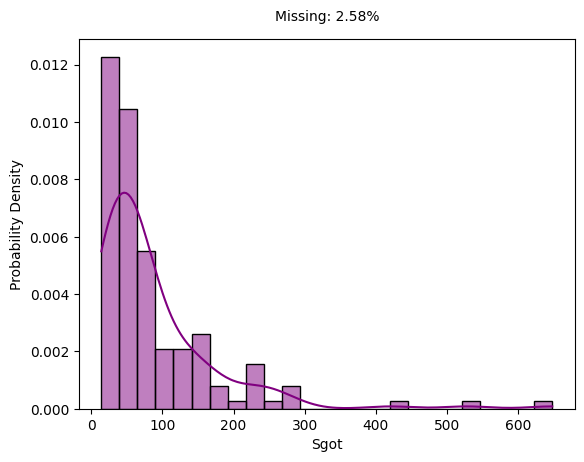

In [575]:
# Sgot
ax = sns.histplot(X["Sgot"], kde = True, stat = "density", color = 'purple')
plt.xlabel('Sgot')
plt.ylabel('Probability Density')
missing_percentage = X['Sgot'].isnull().mean() * 100
ax.annotate(f'Missing: {missing_percentage:.2f}%', xy = (0.5, 1.05), xycoords = 'axes fraction', ha = 'center')

Text(0.5, 1.05, 'Missing: 10.32%')

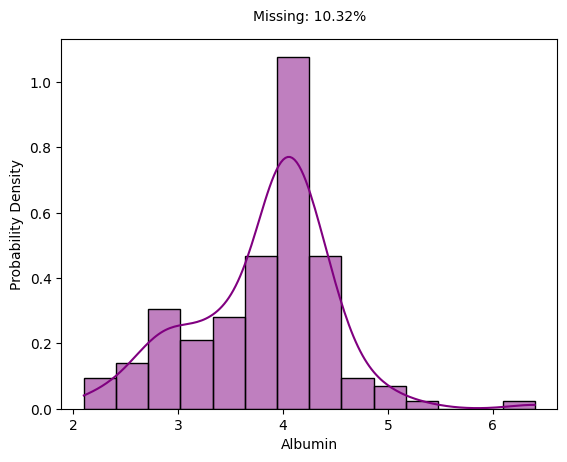

In [576]:
# Albumin
ax = sns.histplot(X["Albumin"], kde = True, stat = "density", color = 'purple')
plt.xlabel('Albumin')
plt.ylabel('Probability Density')
missing_percentage = X['Albumin'].isnull().mean() * 100
ax.annotate(f'Missing: {missing_percentage:.2f}%', xy = (0.5, 1.05), xycoords = 'axes fraction', ha = 'center')

Text(0.5, 1.05, 'Missing: 43.23%')

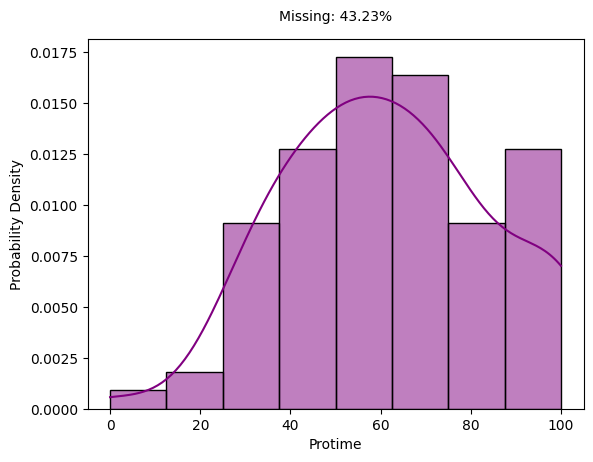

In [577]:
# Protime
ax = sns.histplot(X["Protime"], kde = True, stat = "density", color = 'purple')
plt.xlabel('Protime')
plt.ylabel('Probability Density')
missing_percentage = X['Protime'].isnull().mean() * 100
ax.annotate(f'Missing: {missing_percentage:.2f}%', xy = (0.5, 1.05), xycoords = 'axes fraction', ha = 'center')

# **Exloratory data anlysis**

<ipython-input-578-4316ef0d1c38>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Sex'] = X['Sex'].replace({1: 'Male', 2: 'Female'})
<ipython-input-578-4316ef0d1c38>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'Sex', data = X, order = orders, palette = {'Female': '#377EB8', 'Male': '#FF7F00'})


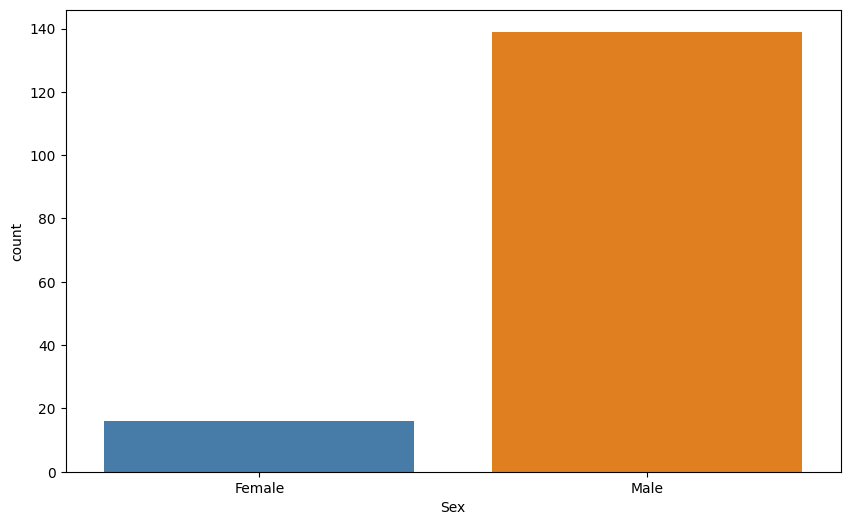

In [578]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sex
X['Sex'] = X['Sex'].replace({1: 'Male', 2: 'Female'})
orders = ['Female', 'Male']

plt.figure(figsize = (10, 6))
sns.countplot(x = 'Sex', data = X, order = orders, palette = {'Female': '#377EB8', 'Male': '#FF7F00'})
plt.xlabel('Sex')
plt.show()

In [579]:
X.columns = X.columns.str.strip()
column_name = 'Sex'
if column_name in X.columns:
    # Count the occurrences of each unique value in the specified column
    value_counts = X[column_name].value_counts()
    print(value_counts)
else:
    print(f"Column '{column_name}' not found in the DataFrame.")
X['Sex'] = X['Sex'].replace({'Female': 1, 'Male': 2}) # Replacing again

Sex
Male      139
Female     16
Name: count, dtype: int64


<ipython-input-579-0e83f44c67b4>:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X['Sex'] = X['Sex'].replace({'Female': 1, 'Male': 2}) # Replacing again
<ipython-input-579-0e83f44c67b4>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Sex'] = X['Sex'].replace({'Female': 1, 'Male': 2}) # Replacing again


<ipython-input-580-0ce18e0c4fd7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Steroid'] = X['Steroid'].replace({1: 'No', 2: 'Yes'})
<ipython-input-580-0ce18e0c4fd7>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'Steroid', data = X, palette = {'No': '#377EB8', 'Yes': '#FF7F00'})


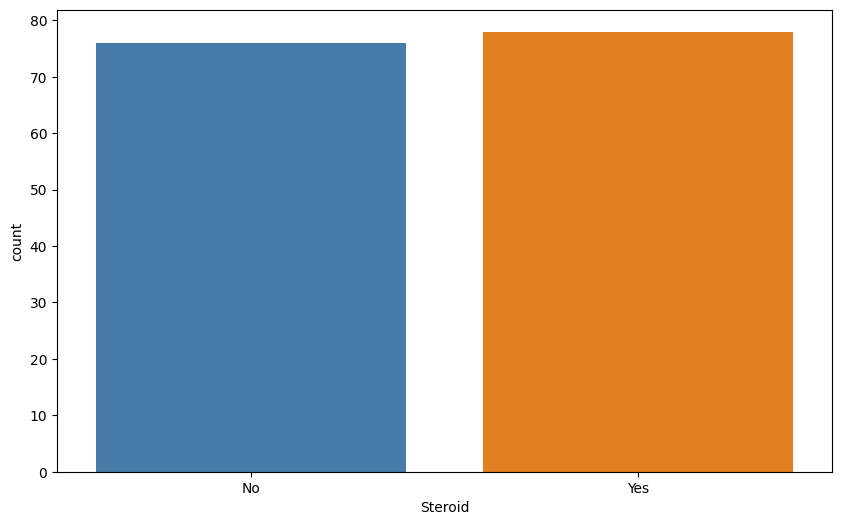

In [580]:
# Steroid
X['Steroid'] = X['Steroid'].replace({1: 'No', 2: 'Yes'})

plt.figure(figsize = (10, 6))
sns.countplot(x = 'Steroid', data = X, palette = {'No': '#377EB8', 'Yes': '#FF7F00'})
plt.xlabel('Steroid')
plt.show()

In [581]:
X.columns = X.columns.str.strip()
column_name = 'Steroid'
if column_name in X.columns:
    # Count the occurrences of each unique value in the specified column
    value_counts = X[column_name].value_counts()
    print(value_counts)
else:
    print(f"Column '{column_name}' not found in the DataFrame.")
X['Steroid'] = X['Steroid'].replace({'No': 1, 'Yes': 2}) # Replacing again

Steroid
Yes    78
No     76
Name: count, dtype: int64


<ipython-input-581-e305aadc26f4>:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X['Steroid'] = X['Steroid'].replace({'No': 1, 'Yes': 2}) # Replacing again
<ipython-input-581-e305aadc26f4>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Steroid'] = X['Steroid'].replace({'No': 1, 'Yes': 2}) # Replacing again


<ipython-input-582-115033470585>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Antivirals'] = X['Antivirals'].replace({1: 'No', 2: 'Yes'})
<ipython-input-582-115033470585>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'Antivirals', data = X, order = orders, palette = {'No': '#377EB8', 'Yes': '#FF7F00'})


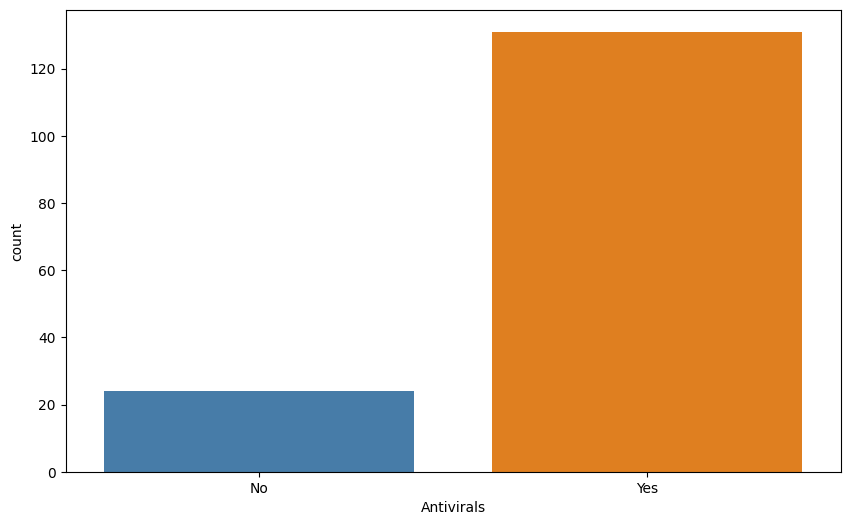

In [582]:
# Antivirals
X['Antivirals'] = X['Antivirals'].replace({1: 'No', 2: 'Yes'})
orders = ['No', 'Yes']

plt.figure(figsize = (10, 6))
sns.countplot(x = 'Antivirals', data = X, order = orders, palette = {'No': '#377EB8', 'Yes': '#FF7F00'})
plt.xlabel('Antivirals')
plt.show()

In [583]:
X.columns = X.columns.str.strip()
column_name = 'Antivirals'
if column_name in X.columns:
    # Count the occurrences of each unique value in the specified column
    value_counts = X[column_name].value_counts()
    print(value_counts)
else:
    print(f"Column '{column_name}' not found in the DataFrame.")
X['Antivirals'] = X['Antivirals'].replace({'No': 1, 'Yes': 2}) # Replacing again

Antivirals
Yes    131
No      24
Name: count, dtype: int64


<ipython-input-583-dbe223ebf2d3>:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X['Antivirals'] = X['Antivirals'].replace({'No': 1, 'Yes': 2}) # Replacing again
<ipython-input-583-dbe223ebf2d3>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Antivirals'] = X['Antivirals'].replace({'No': 1, 'Yes': 2}) # Replacing again


<ipython-input-584-8c9dc37ae27e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Fatigue'] = X['Fatigue'].replace({1: 'No', 2: 'Yes'})
<ipython-input-584-8c9dc37ae27e>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'Fatigue', data = X, order = orders, palette = {'No': '#377EB8', 'Yes': '#FF7F00'})


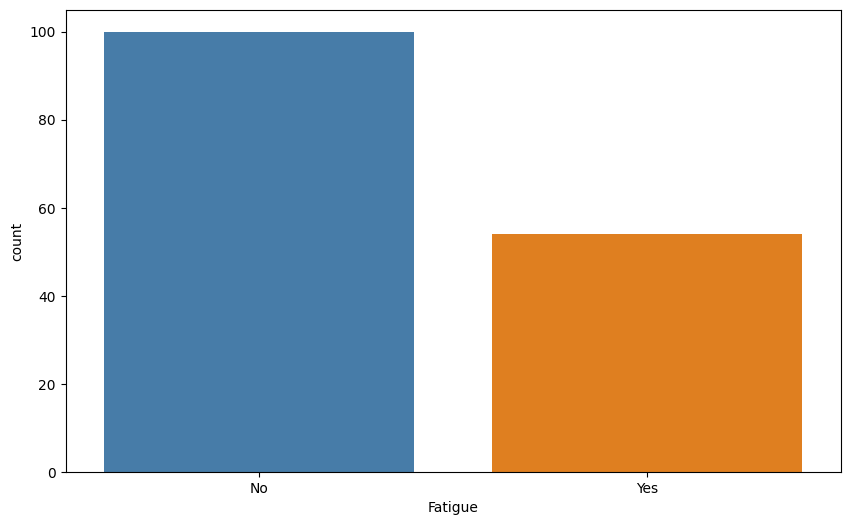

In [584]:
# Fatigue
X['Fatigue'] = X['Fatigue'].replace({1: 'No', 2: 'Yes'})
orders = ['No', 'Yes']

plt.figure(figsize = (10, 6))
sns.countplot(x = 'Fatigue', data = X, order = orders, palette = {'No': '#377EB8', 'Yes': '#FF7F00'})
plt.xlabel('Fatigue')
plt.show()

In [585]:
X.columns = X.columns.str.strip()
column_name = 'Fatigue'
if column_name in X.columns:
    # Count the occurrences of each unique value in the specified column
    value_counts = X[column_name].value_counts()
    print(value_counts)
else:
    print(f"Column '{column_name}' not found in the DataFrame.")
X['Fatigue'] = X['Fatigue'].replace({'No': 1, 'Yes': 2}) # Replacing again

Fatigue
No     100
Yes     54
Name: count, dtype: int64


<ipython-input-585-bc5149156a87>:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X['Fatigue'] = X['Fatigue'].replace({'No': 1, 'Yes': 2}) # Replacing again
<ipython-input-585-bc5149156a87>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Fatigue'] = X['Fatigue'].replace({'No': 1, 'Yes': 2}) # Replacing again


<ipython-input-586-9c08a48e89d5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Malaise'] = X['Malaise'].replace({1: 'No', 2: 'Yes'})
<ipython-input-586-9c08a48e89d5>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'Malaise', data = X, order = orders, palette = {'No': '#377EB8', 'Yes': '#FF7F00'})


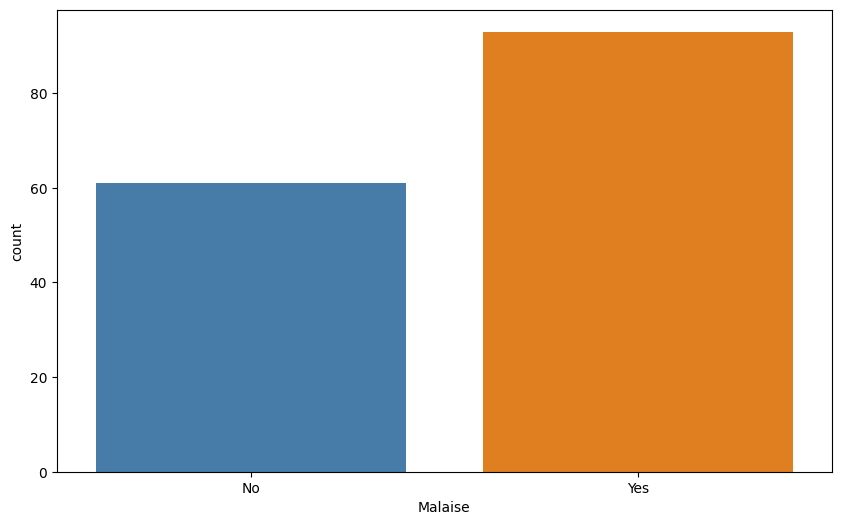

In [586]:
# Malaise
X['Malaise'] = X['Malaise'].replace({1: 'No', 2: 'Yes'})
orders = ['No', 'Yes']

plt.figure(figsize = (10, 6))
sns.countplot(x = 'Malaise', data = X, order = orders, palette = {'No': '#377EB8', 'Yes': '#FF7F00'})
plt.xlabel('Malaise')
plt.show()

In [587]:
X.columns = X.columns.str.strip()
column_name = 'Malaise'
if column_name in X.columns:
    # Count the occurrences of each unique value in the specified column
    value_counts = X[column_name].value_counts()
    print(value_counts)
else:
    print(f"Column '{column_name}' not found in the DataFrame.")
X['Malaise'] = X['Malaise'].replace({'No': 1, 'Yes': 2}) # Replacing again

Malaise
Yes    93
No     61
Name: count, dtype: int64


<ipython-input-587-2b6c640e46f3>:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X['Malaise'] = X['Malaise'].replace({'No': 1, 'Yes': 2}) # Replacing again
<ipython-input-587-2b6c640e46f3>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Malaise'] = X['Malaise'].replace({'No': 1, 'Yes': 2}) # Replacing again


<ipython-input-588-cbe04055e03b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Anorexia'] = X['Anorexia'].replace({1: 'No', 2: 'Yes'})
<ipython-input-588-cbe04055e03b>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'Anorexia', data = X, order = orders, palette = {'No': '#377EB8', 'Yes': '#FF7F00'})


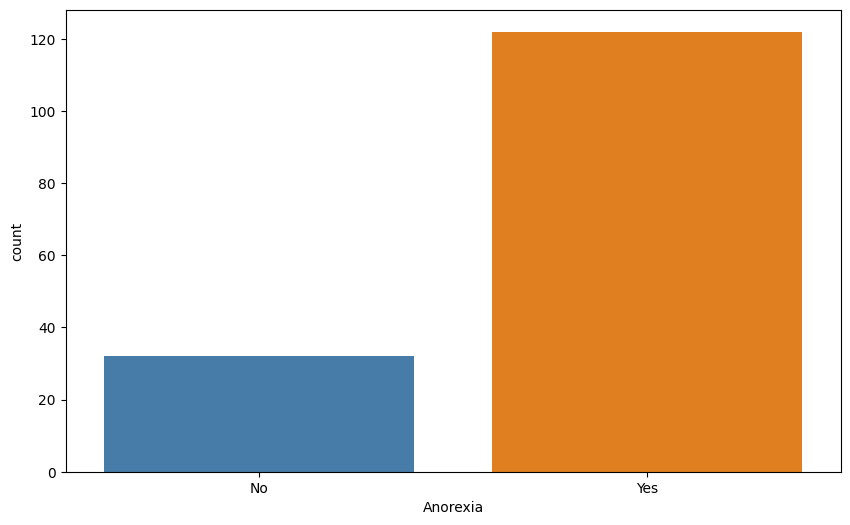

In [588]:
# Anorexia
X['Anorexia'] = X['Anorexia'].replace({1: 'No', 2: 'Yes'})
orders = ['No', 'Yes']

plt.figure(figsize = (10, 6))
sns.countplot(x = 'Anorexia', data = X, order = orders, palette = {'No': '#377EB8', 'Yes': '#FF7F00'})
plt.xlabel('Anorexia')
plt.show()

In [589]:
X.columns = X.columns.str.strip()
column_name = 'Anorexia'
if column_name in X.columns:
    # Count the occurrences of each unique value in the specified column
    value_counts = X[column_name].value_counts()
    print(value_counts)
else:
    print(f"Column '{column_name}' not found in the DataFrame.")
X['Anorexia'] = X['Anorexia'].replace({'No': 1, 'Yes': 2}) # Replacing again

Anorexia
Yes    122
No      32
Name: count, dtype: int64


<ipython-input-589-d9722804ca67>:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X['Anorexia'] = X['Anorexia'].replace({'No': 1, 'Yes': 2}) # Replacing again
<ipython-input-589-d9722804ca67>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Anorexia'] = X['Anorexia'].replace({'No': 1, 'Yes': 2}) # Replacing again


<ipython-input-590-1b51654b43e4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Liver Big'] = X['Liver Big'].replace({1: 'No', 2: 'Yes'})
<ipython-input-590-1b51654b43e4>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'Liver Big', data = X, order = orders, palette = {'No': '#377EB8', 'Yes': '#FF7F00'})


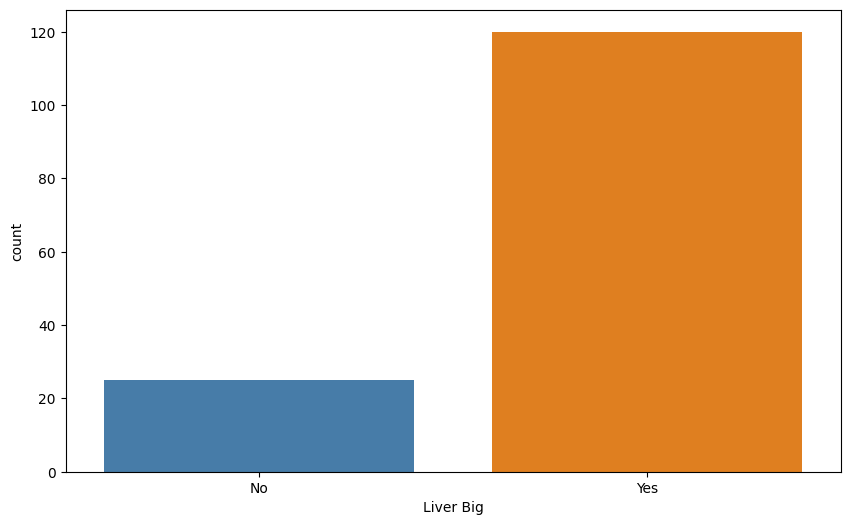

In [590]:
# Liver Big
X['Liver Big'] = X['Liver Big'].replace({1: 'No', 2: 'Yes'})
orders = ['No', 'Yes']

plt.figure(figsize = (10, 6))
sns.countplot(x = 'Liver Big', data = X, order = orders, palette = {'No': '#377EB8', 'Yes': '#FF7F00'})
plt.xlabel('Liver Big')
plt.show()

In [591]:
X.columns = X.columns.str.strip()
column_name = 'Liver Big'
if column_name in X.columns:
    # Count the occurrences of each unique value in the specified column
    value_counts = X[column_name].value_counts()
    print(value_counts)
else:
    print(f"Column '{column_name}' not found in the DataFrame.")
X['Liver Big'] = X['Liver Big'].replace({'No': 1, 'Yes': 2}) # Replacing again

Liver Big
Yes    120
No      25
Name: count, dtype: int64


<ipython-input-591-a36a15349564>:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X['Liver Big'] = X['Liver Big'].replace({'No': 1, 'Yes': 2}) # Replacing again
<ipython-input-591-a36a15349564>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Liver Big'] = X['Liver Big'].replace({'No': 1, 'Yes': 2}) # Replacing again


<ipython-input-592-86003c9c4414>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Liver Firm'] = X['Liver Firm'].replace({1: 'No', 2: 'Yes'})
<ipython-input-592-86003c9c4414>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'Liver Firm', data = X, order = orders, palette = {'No': '#377EB8', 'Yes': '#FF7F00'})


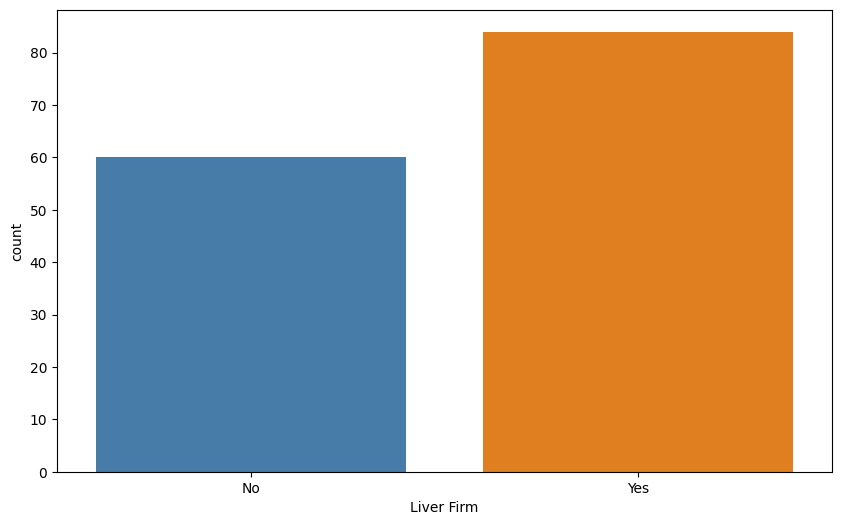

In [592]:
# Liver Firm
X['Liver Firm'] = X['Liver Firm'].replace({1: 'No', 2: 'Yes'})
orders = ['No', 'Yes']

plt.figure(figsize = (10, 6))
sns.countplot(x = 'Liver Firm', data = X, order = orders, palette = {'No': '#377EB8', 'Yes': '#FF7F00'})
plt.xlabel('Liver Firm')
plt.show()

In [593]:
X.columns = X.columns.str.strip()
column_name = 'Liver Firm'
if column_name in X.columns:
    # Count the occurrences of each unique value in the specified column
    value_counts = X[column_name].value_counts()
    print(value_counts)
else:
    print(f"Column '{column_name}' not found in the DataFrame.")
X['Liver Firm'] = X['Liver Firm'].replace({'No': 1, 'Yes': 2}) # Replacing again

Liver Firm
Yes    84
No     60
Name: count, dtype: int64


<ipython-input-593-ba6fd1015d85>:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X['Liver Firm'] = X['Liver Firm'].replace({'No': 1, 'Yes': 2}) # Replacing again
<ipython-input-593-ba6fd1015d85>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Liver Firm'] = X['Liver Firm'].replace({'No': 1, 'Yes': 2}) # Replacing again


<ipython-input-594-3b8cd668b4a5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Spleen Palpable'] = X['Spleen Palpable'].replace({1: 'No', 2: 'Yes'})
<ipython-input-594-3b8cd668b4a5>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'Spleen Palpable', data = X, order = orders, palette = {'No': '#377EB8', 'Yes': '#FF7F00'})


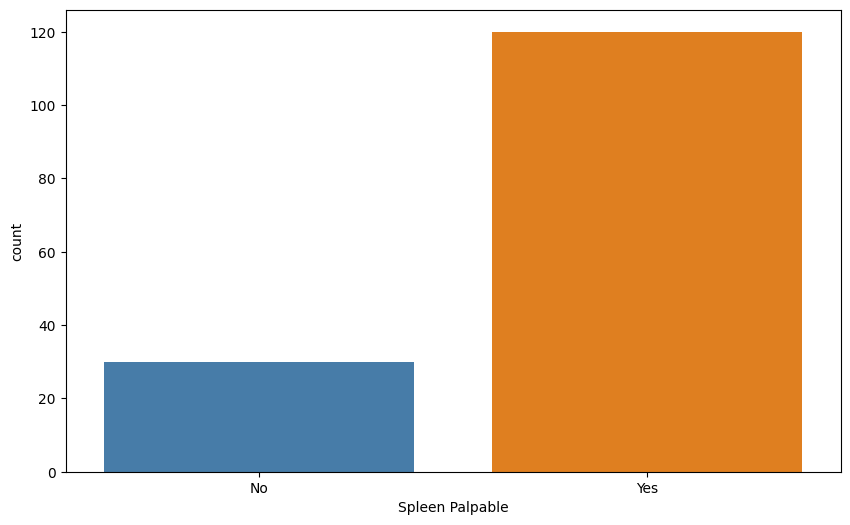

In [594]:
# Spleen Palpable
X['Spleen Palpable'] = X['Spleen Palpable'].replace({1: 'No', 2: 'Yes'})
orders = ['No', 'Yes']

plt.figure(figsize = (10, 6))
sns.countplot(x = 'Spleen Palpable', data = X, order = orders, palette = {'No': '#377EB8', 'Yes': '#FF7F00'})
plt.xlabel('Spleen Palpable')
plt.show()

In [595]:
X.columns = X.columns.str.strip()
column_name = 'Spleen Palpable'
if column_name in X.columns:
    # Count the occurrences of each unique value in the specified column
    value_counts = X[column_name].value_counts()
    print(value_counts)
else:
    print(f"Column '{column_name}' not found in the DataFrame.")
X['Spleen Palpable'] = X['Spleen Palpable'].replace({'No': 1, 'Yes': 2}) # Replacing again

Spleen Palpable
Yes    120
No      30
Name: count, dtype: int64


<ipython-input-595-e4abccdf840a>:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X['Spleen Palpable'] = X['Spleen Palpable'].replace({'No': 1, 'Yes': 2}) # Replacing again
<ipython-input-595-e4abccdf840a>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Spleen Palpable'] = X['Spleen Palpable'].replace({'No': 1, 'Yes': 2}) # Replacing again


<ipython-input-596-e820a8347a5c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Spiders'] = X['Spiders'].replace({1: 'No', 2: 'Yes'})
<ipython-input-596-e820a8347a5c>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'Spiders', data = X, order = orders, palette = {'No': '#377EB8', 'Yes': '#FF7F00'})


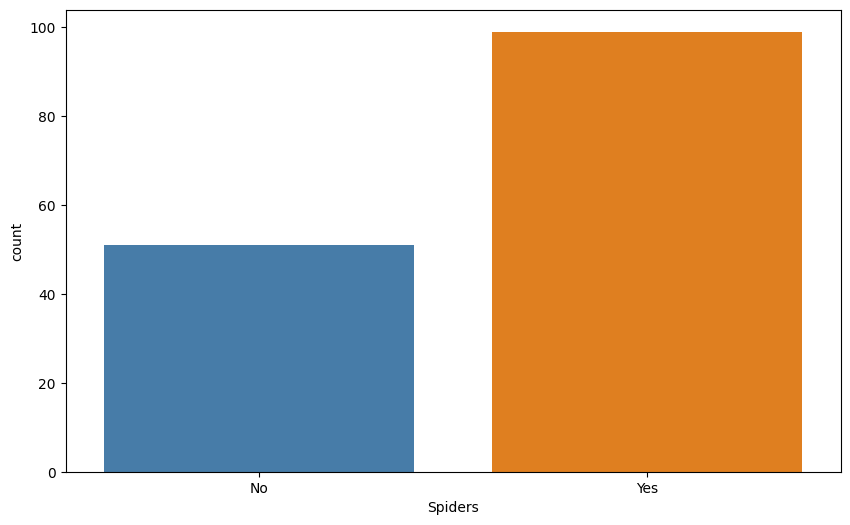

In [596]:
# Spiders
X['Spiders'] = X['Spiders'].replace({1: 'No', 2: 'Yes'})
orders = ['No', 'Yes']

plt.figure(figsize = (10, 6))
sns.countplot(x = 'Spiders', data = X, order = orders, palette = {'No': '#377EB8', 'Yes': '#FF7F00'})
plt.xlabel('Spiders')
plt.show()

In [597]:
X.columns = X.columns.str.strip()
column_name = 'Spiders'
if column_name in X.columns:
    # Count the occurrences of each unique value in the specified column
    value_counts = X[column_name].value_counts()
    print(value_counts)
else:
    print(f"Column '{column_name}' not found in the DataFrame.")
X['Spiders'] = X['Spiders'].replace({'No': 1, 'Yes': 2}) # Replacing again

Spiders
Yes    99
No     51
Name: count, dtype: int64


<ipython-input-597-19558be12dc8>:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X['Spiders'] = X['Spiders'].replace({'No': 1, 'Yes': 2}) # Replacing again
<ipython-input-597-19558be12dc8>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Spiders'] = X['Spiders'].replace({'No': 1, 'Yes': 2}) # Replacing again


<ipython-input-598-993abe5f1212>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Ascites'] = X['Ascites'].replace({1: 'No', 2: 'Yes'})
<ipython-input-598-993abe5f1212>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'Ascites', data = X, order = orders, palette = {'No': '#377EB8', 'Yes': '#FF7F00'})


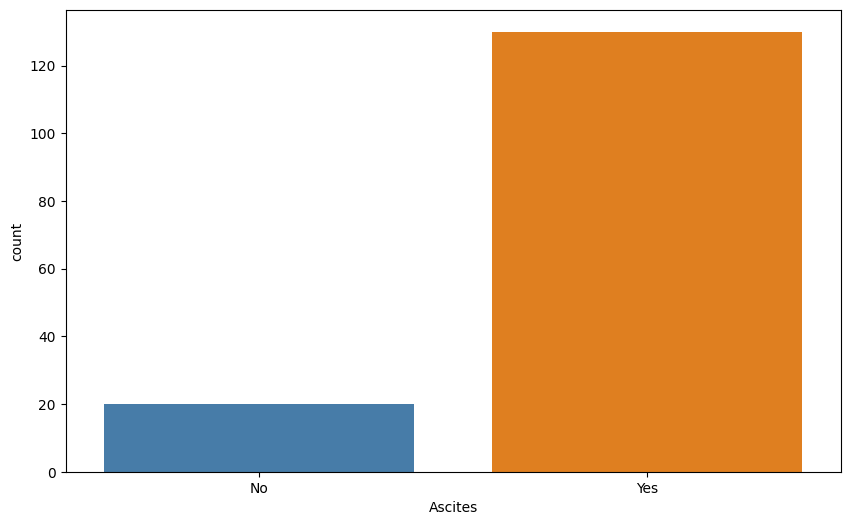

In [598]:
# Ascites
X['Ascites'] = X['Ascites'].replace({1: 'No', 2: 'Yes'})
orders = ['No', 'Yes']

plt.figure(figsize = (10, 6))
sns.countplot(x = 'Ascites', data = X, order = orders, palette = {'No': '#377EB8', 'Yes': '#FF7F00'})
plt.xlabel('Ascites')
plt.show()

In [599]:
X.columns = X.columns.str.strip()
column_name = 'Ascites'
if column_name in X.columns:
    # Count the occurrences of each unique value in the specified column
    value_counts = X[column_name].value_counts()
    print(value_counts)
else:
    print(f"Column '{column_name}' not found in the DataFrame.")
X['Ascites'] = X['Ascites'].replace({'No': 1, 'Yes': 2}) # Replacing again

Ascites
Yes    130
No      20
Name: count, dtype: int64


<ipython-input-599-d795545562b7>:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X['Ascites'] = X['Ascites'].replace({'No': 1, 'Yes': 2}) # Replacing again
<ipython-input-599-d795545562b7>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Ascites'] = X['Ascites'].replace({'No': 1, 'Yes': 2}) # Replacing again


<ipython-input-600-4694c8fc6f30>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Varices'] = X['Varices'].replace({1: 'No', 2: 'Yes'})
<ipython-input-600-4694c8fc6f30>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'Varices', data = X, order = orders, palette = {'No': '#377EB8', 'Yes': '#FF7F00'})


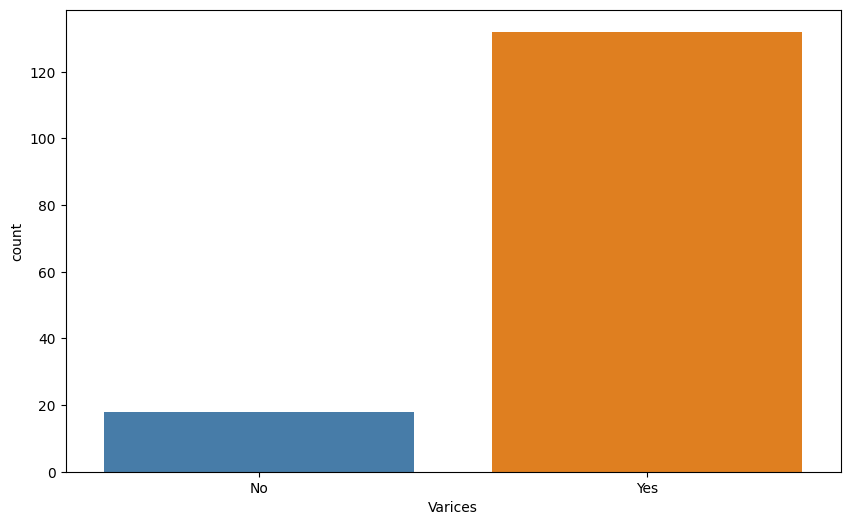

In [600]:
# Varices
X['Varices'] = X['Varices'].replace({1: 'No', 2: 'Yes'})
orders = ['No', 'Yes']

plt.figure(figsize = (10, 6))
sns.countplot(x = 'Varices', data = X, order = orders, palette = {'No': '#377EB8', 'Yes': '#FF7F00'})
plt.xlabel('Varices')
plt.show()

In [601]:
X.columns = X.columns.str.strip()
column_name = 'Varices'
if column_name in X.columns:
    # Count the occurrences of each unique value in the specified column
    value_counts = X[column_name].value_counts()
    print(value_counts)
else:
    print(f"Column '{column_name}' not found in the DataFrame.")
X['Varices'] = X['Varices'].replace({'No': 1, 'Yes': 2}) # Replacing again

Varices
Yes    132
No      18
Name: count, dtype: int64


<ipython-input-601-39bd25e5bf2d>:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X['Varices'] = X['Varices'].replace({'No': 1, 'Yes': 2}) # Replacing again
<ipython-input-601-39bd25e5bf2d>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Varices'] = X['Varices'].replace({'No': 1, 'Yes': 2}) # Replacing again


<ipython-input-602-c6750b6205e9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Histology'] = X['Histology'].replace({1: 'No', 2: 'Yes'})
<ipython-input-602-c6750b6205e9>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'Histology', data = X, order = orders, palette = {'No': '#377EB8', 'Yes': '#FF7F00'})


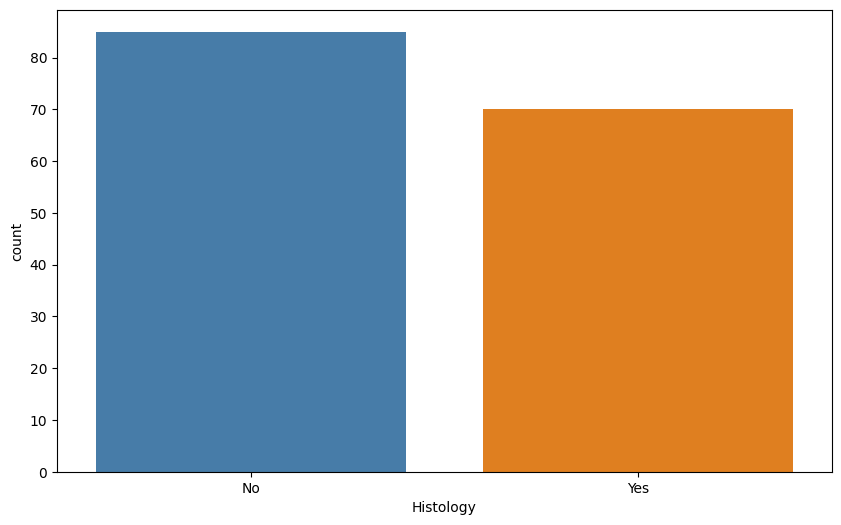

In [602]:
# Histology
X['Histology'] = X['Histology'].replace({1: 'No', 2: 'Yes'})
orders = ['No', 'Yes']

plt.figure(figsize = (10, 6))
sns.countplot(x = 'Histology', data = X, order = orders, palette = {'No': '#377EB8', 'Yes': '#FF7F00'})
plt.xlabel('Histology')
plt.show()

In [603]:
X.columns = X.columns.str.strip()
column_name = 'Histology'
if column_name in X.columns:
    # Count the occurrences of each unique value in the specified column
    value_counts = X[column_name].value_counts()
    print(value_counts)
else:
    print(f"Column '{column_name}' not found in the DataFrame.")
X['Histology'] = X['Histology'].replace({'No': 1, 'Yes': 2}) # Replacing again

Histology
No     85
Yes    70
Name: count, dtype: int64


<ipython-input-603-2ae48fda89cf>:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X['Histology'] = X['Histology'].replace({'No': 1, 'Yes': 2}) # Replacing again
<ipython-input-603-2ae48fda89cf>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Histology'] = X['Histology'].replace({'No': 1, 'Yes': 2}) # Replacing again


<ipython-input-604-411f0cb6aacb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['Class'] = y['Class'].replace({1: 'Die', 2: 'Live'})
<ipython-input-604-411f0cb6aacb>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'Class', data = y, palette = {'Die': '#FF7F00', 'Live': '#377EB8'})


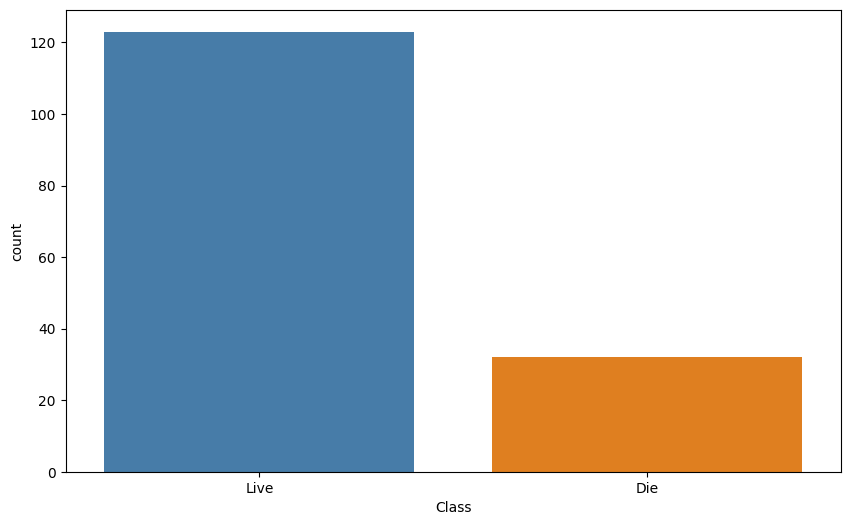

In [604]:
# Class
y['Class'] = y['Class'].replace({1: 'Die', 2: 'Live'})

plt.figure(figsize = (10, 6))
sns.countplot(x = 'Class', data = y, palette = {'Die': '#FF7F00', 'Live': '#377EB8'})
plt.xlabel('Class')
plt.show()


In [605]:
y.columns = y.columns.str.strip()
column_name = 'Class'
if column_name in y.columns:
    # Count the occurrences of each unique value in the specified column
    value_counts = y[column_name].value_counts()
    print(value_counts)
else:
    print(f"Column '{column_name}' not found in the DataFrame.")
y['Class'] = y['Class'].replace({'Die': 1, 'Live': 2}) # Replacing again

Class
Live    123
Die      32
Name: count, dtype: int64


<ipython-input-605-da5018641913>:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y['Class'] = y['Class'].replace({'Die': 1, 'Live': 2}) # Replacing again
<ipython-input-605-da5018641913>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['Class'] = y['Class'].replace({'Die': 1, 'Live': 2}) # Replacing again


# **Handle Missing Values**

In [606]:
X.isnull().sum()

,0
Age,0
Sex,0
Steroid,1
Antivirals,0
Fatigue,1
Malaise,1
Anorexia,1
Liver Big,10
Liver Firm,11
Spleen Palpable,5


In [607]:
X.loc[:, 'Steroid'] = X['Steroid'].fillna(X['Steroid'].mean())
X.loc[:, 'Fatigue'] = X['Fatigue'].fillna(X['Fatigue'].mean())
X.loc[:, 'Malaise'] = X['Malaise'].fillna(X['Malaise'].mean())
X.loc[:, 'Anorexia'] = X['Anorexia'].fillna(X['Anorexia'].mean())
X.loc[:, 'Liver Big'] = X['Liver Big'].fillna(X['Liver Big'].mean())
X.loc[:, 'Liver Firm'] = X['Liver Firm'].fillna(X['Liver Firm'].mean())
X.loc[:, 'Spleen Palpable'] = X['Spleen Palpable'].fillna(X['Spleen Palpable'].mean())
X.loc[:, 'Spiders'] = X['Spiders'].fillna(X['Spiders'].mean())
X.loc[:, 'Ascites'] = X['Ascites'].fillna(X['Ascites'].mean())
X.loc[:, 'Varices'] = X['Varices'].fillna(X['Varices'].mean())
X.loc[:, 'Bilirubin'] = X['Bilirubin'].fillna(X['Bilirubin'].mean())
X.loc[:, 'Alk Phosphate'] = X['Alk Phosphate'].fillna(X['Alk Phosphate'].mean())
X.loc[:, 'Sgot'] = X['Sgot'].fillna(X['Sgot'].mean())
X.loc[:, 'Albumin'] = X['Albumin'].fillna(X['Albumin'].mean())
X.loc[:, 'Protime'] = X['Protime'].fillna(X['Protime'].mean())

In [608]:
X.isnull().sum()

,0
Age,0
Sex,0
Steroid,0
Antivirals,0
Fatigue,0
Malaise,0
Anorexia,0
Liver Big,0
Liver Firm,0
Spleen Palpable,0


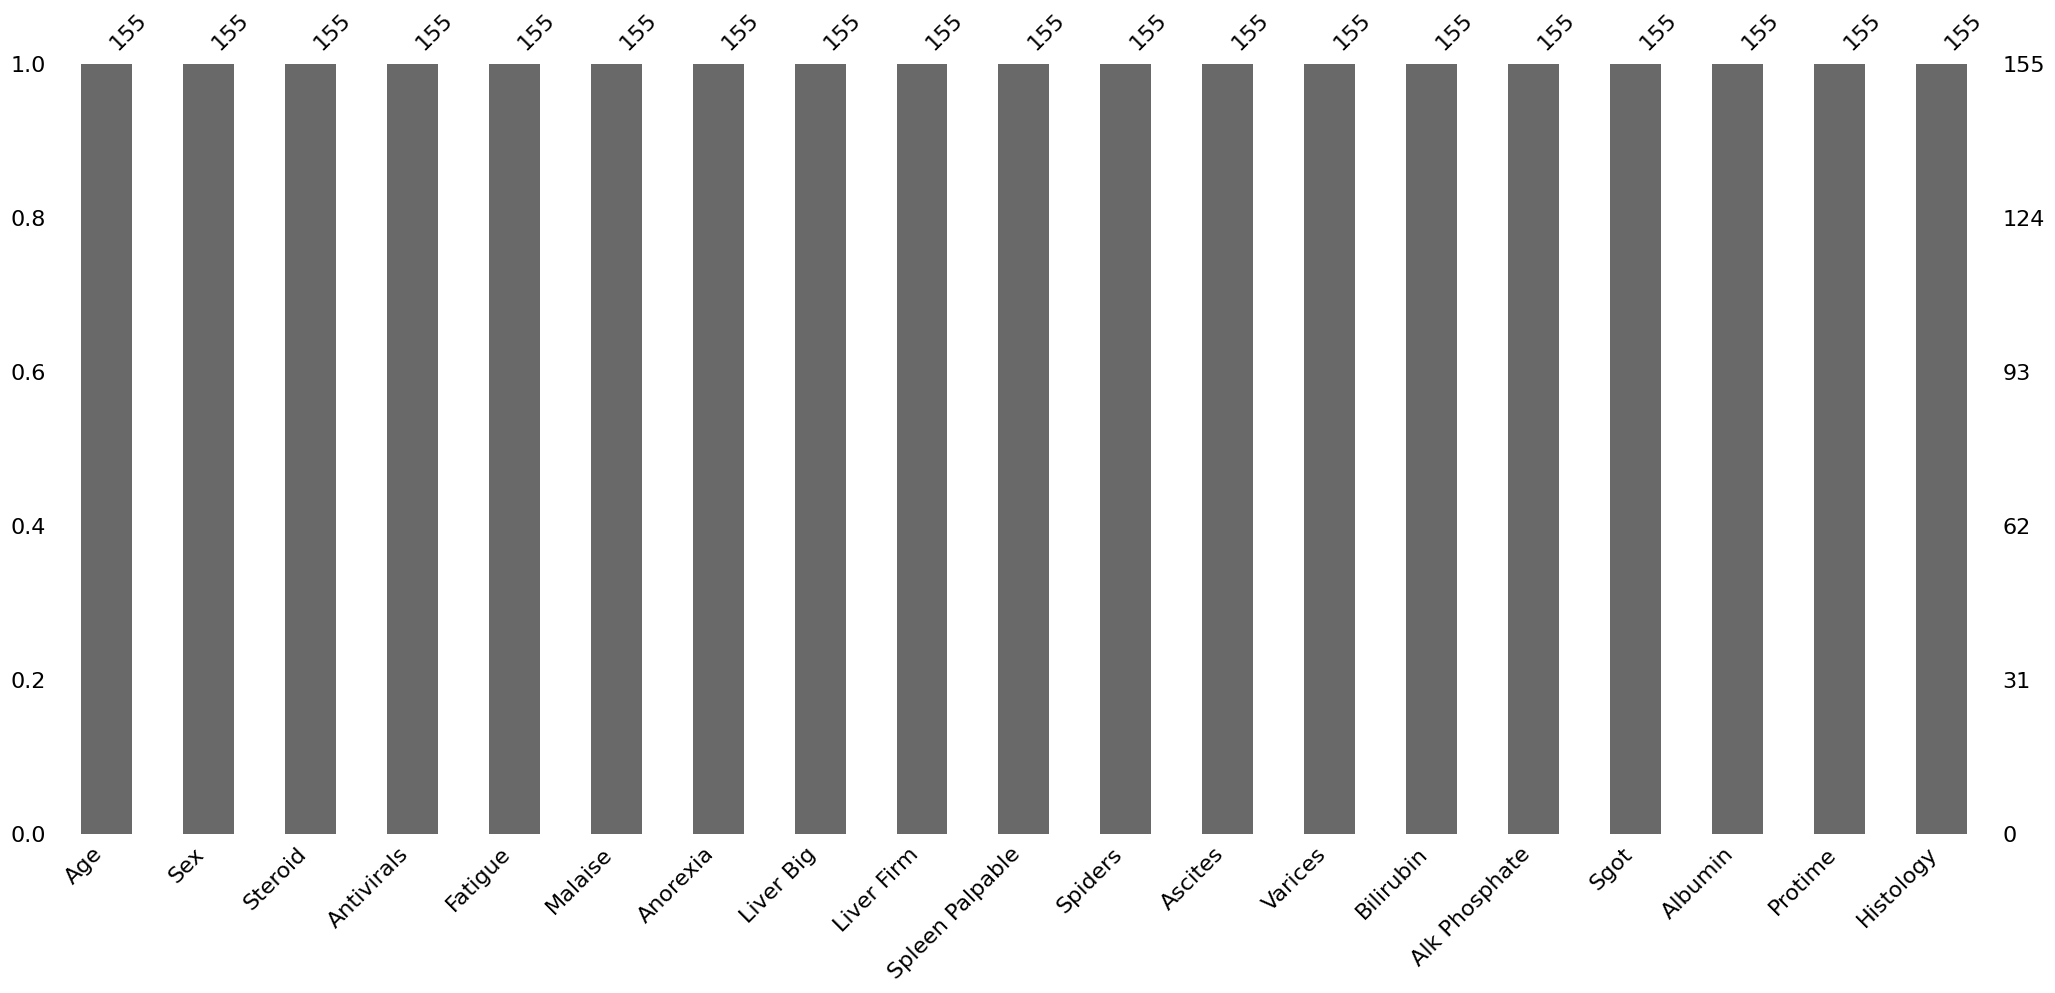

In [609]:
bar = msno.bar(X)

In [430]:
X.head()

,Age,Sex,Steroid,Antivirals,Fatigue,Malaise,Anorexia,Liver Big,Liver Firm,Spleen Palpable,Spiders,Ascites,Varices,Bilirubin,Alk Phosphate,Sgot,Albumin,Protime,Histology
0,30,2,1.000000,2,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,85.000000,18.0,4.0,61.852273,1
1,50,1,1.000000,2,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,0.9,135.000000,42.0,3.5,61.852273,1
2,78,1,2.000000,2,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.7,96.000000,32.0,4.0,61.852273,1
3,31,1,1.506494,1,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.7,46.000000,52.0,4.0,80.000000,1
4,34,1,2.000000,2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,105.325397,200.0,4.0,61.852273,1


# **Chi2 Feature Selection**

In [431]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [432]:
from sklearn.feature_selection import chi2
f_p_values = chi2(x_train, y_train)
f_p_values

(array([1.65170300e+01, 2.67379679e-01, 1.32531315e-01, 1.58469544e-01,
        1.77819934e+00, 1.36107785e+00, 1.77913026e-01, 3.31223303e-02,
        4.31955753e-02, 6.43746193e-01, 3.84773458e+00, 2.41493929e+00,
        1.04548986e+00, 2.42362514e+01, 3.94824671e+00, 3.13120650e+00,
        2.67661075e+00, 4.90213876e+01, 2.61818182e+00]),
 array([4.82150693e-05, 6.05094946e-01, 7.15821788e-01, 6.90569497e-01,
        1.82370592e-01, 2.43350768e-01, 6.73172921e-01, 8.55586326e-01,
        8.35357450e-01, 4.22357493e-01, 4.98132298e-02, 1.20182629e-01,
        3.06548103e-01, 8.52131871e-07, 4.69202300e-02, 7.68068784e-02,
        1.01832248e-01, 2.53186683e-12, 1.05645429e-01]))

In [433]:
p_values = pd.Series(f_p_values[1])
p_values.index = x_train.columns
p_values.sort_values(ascending = True) # Sorting by values, the lesser value means the heigher important of that feature for ML

,0
Protime,2.531867e-12
Bilirubin,8.521319e-07
Age,4.821507e-05
Alk Phosphate,4.692023e-02
Spiders,4.981323e-02
Sgot,7.680688e-02
Albumin,1.018322e-01
Histology,1.056454e-01
Ascites,1.201826e-01
Fatigue,1.823706e-01


# **Most important 80% features after using Chi2 feature selection**

In [434]:
X = X[['Protime', 'Bilirubin', 'Age', 'Alk Phosphate', 'Spiders', 'Albumin', 'Histology', 'Ascites', 'Fatigue', 'Malaise', 'Varices', 'Spleen Palpable', 'Sgot', 'Sex', 'Anorexia', 'Antivirals']]

In [435]:
X.head()

,Protime,Bilirubin,Age,Alk Phosphate,Spiders,Albumin,Histology,Ascites,Fatigue,Malaise,Varices,Spleen Palpable,Sgot,Sex,Anorexia,Antivirals
0,61.852273,1.0,30,85.000000,2.0,4.0,1,2.0,2.0,2.0,2.0,2.0,18.0,2,2.0,2
1,61.852273,0.9,50,135.000000,2.0,3.5,1,2.0,1.0,2.0,2.0,2.0,42.0,1,2.0,2
2,61.852273,0.7,78,96.000000,2.0,4.0,1,2.0,1.0,2.0,2.0,2.0,32.0,1,2.0,2
3,80.000000,0.7,31,46.000000,2.0,4.0,1,2.0,2.0,2.0,2.0,2.0,52.0,1,2.0,1
4,61.852273,1.0,34,105.325397,2.0,4.0,1,2.0,2.0,2.0,2.0,2.0,200.0,1,2.0,2


In [436]:
X.head()

,Protime,Bilirubin,Age,Alk Phosphate,Spiders,Albumin,Histology,Ascites,Fatigue,Malaise,Varices,Spleen Palpable,Sgot,Sex,Anorexia,Antivirals
0,61.852273,1.0,30,85.000000,2.0,4.0,1,2.0,2.0,2.0,2.0,2.0,18.0,2,2.0,2
1,61.852273,0.9,50,135.000000,2.0,3.5,1,2.0,1.0,2.0,2.0,2.0,42.0,1,2.0,2
2,61.852273,0.7,78,96.000000,2.0,4.0,1,2.0,1.0,2.0,2.0,2.0,32.0,1,2.0,2
3,80.000000,0.7,31,46.000000,2.0,4.0,1,2.0,2.0,2.0,2.0,2.0,52.0,1,2.0,1
4,61.852273,1.0,34,105.325397,2.0,4.0,1,2.0,2.0,2.0,2.0,2.0,200.0,1,2.0,2


# **Correlation of Selected Features**

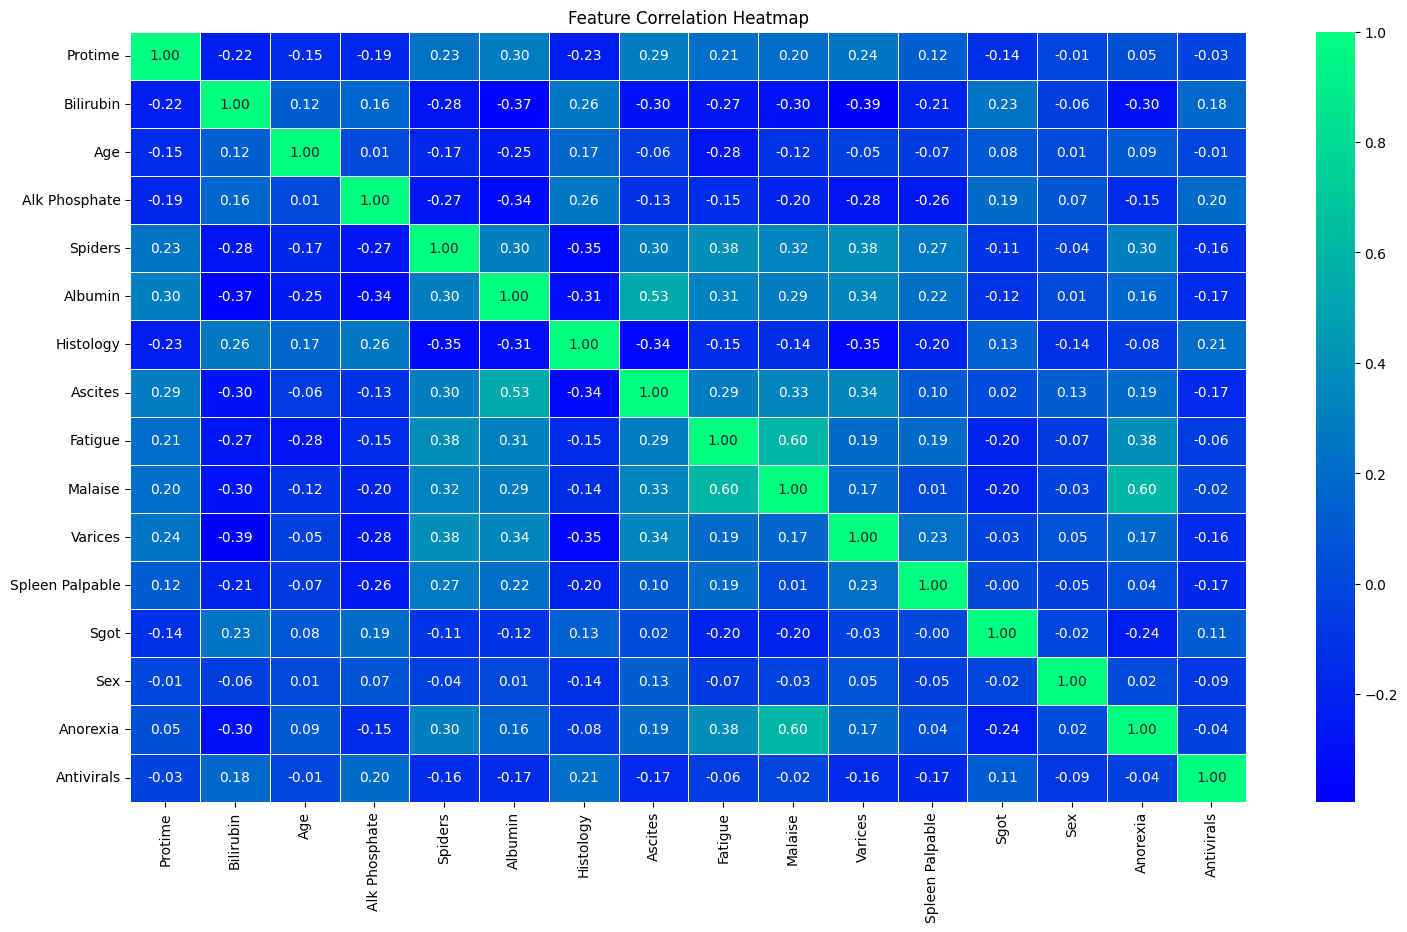

In [437]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
df = X

features = ['Protime', 'Bilirubin', 'Age', 'Alk Phosphate', 'Spiders', 'Albumin', 'Histology', 'Ascites', 'Fatigue', 'Malaise', 'Varices', 'Spleen Palpable', 'Sgot', 'Sex', 'Anorexia', 'Antivirals']  # Add your feature names here

# Converting X to a pandas DataFrame with feature names as columns
X_df = pd.DataFrame(X, columns = features)

# Calculate the correlation matrix
correlation_matrix = X_df.corr()

# Plotting the heatmap
plt.figure(figsize = (18, 10))
sns.heatmap(correlation_matrix, annot = True, cmap = 'winter', fmt = '.2f', linewidths = 0.5)

# Show the heatmap
plt.title("Feature Correlation Heatmap")
plt.show()


# **Data imblance handling (SMOTE)**

In [438]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [439]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# Applying SMOTE
smote = SMOTE(random_state = 42)
x_res, y_res = smote.fit_resample(x_train, y_train)

# Shape after SMOTE
print(f'Resampled X shape: {x_res.shape}')
print(f'Resampled y shape: {y_res.shape}')

Resampled X shape: (198, 16)
Resampled y shape: (198, 1)


In [440]:
x_res.head()

,Protime,Bilirubin,Age,Alk Phosphate,Spiders,Albumin,Histology,Ascites,Fatigue,Malaise,Varices,Spleen Palpable,Sgot,Sex,Anorexia,Antivirals
0,100.000000,0.8,30,147.000000,1.0,3.900000,2,2.0,1.0,1.0,2.0,2.0,128.0,1,2.0,2
1,61.852273,1.5,42,85.000000,2.0,3.817266,2,2.0,2.0,2.0,2.0,1.0,40.0,1,2.0,2
2,100.000000,0.7,30,100.000000,2.0,4.000000,1,2.0,2.0,2.0,2.0,2.0,31.0,1,2.0,2
3,31.000000,0.7,33,63.000000,2.0,3.000000,2,1.0,1.0,1.0,2.0,2.0,80.0,1,2.0,2
4,61.852273,0.8,27,105.325397,2.0,4.200000,1,2.0,2.0,2.0,2.0,2.0,38.0,1,2.0,2


In [441]:
x_res.tail()

,Protime,Bilirubin,Age,Alk Phosphate,Spiders,Albumin,Histology,Ascites,Fatigue,Malaise,Varices,Spleen Palpable,Sgot,Sex,Anorexia,Antivirals
193,61.852273,3.842209,40,113.312666,1.000000,3.128886,2,1.755551,1.0,1.244449,1.244449,1.000000,55.733347,1,1.244449,2
194,56.394916,1.885601,58,153.272110,1.000000,3.368639,1,2.000000,1.0,1.771202,2.000000,1.000000,222.552156,1,2.000000,2
195,33.375005,4.753812,47,118.535165,1.000000,2.753886,2,1.076980,1.0,1.076980,1.000000,1.923020,154.151743,1,2.000000,2
196,46.522983,5.832516,49,105.810616,1.000000,3.386925,2,1.289751,1.0,1.000000,1.289751,1.710249,217.371127,1,1.289751,2
197,31.644885,0.812855,35,66.546868,1.838779,3.080611,2,1.161221,1.0,1.000000,2.000000,1.838779,78.387787,1,2.000000,2


# **Scalling**

In [442]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Sample data
data = x_res

# Standardization
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Display scaled data
X = scaled_data
print(X)


[[ 2.38194849 -0.80828378 -1.11668674 ... -0.25400025  0.65990931
   0.35355339]
 [ 0.17894426 -0.31878374 -0.0633927  ... -0.25400025  0.65990931
   0.35355339]
 [ 2.38194849 -0.87821236 -1.11668674 ... -0.25400025  0.65990931
   0.35355339]
 ...
 [-1.46559777  1.95656073  0.37547982 ... -0.25400025  0.65990931
   0.35355339]
 [-0.70631139  2.71088315  0.55102883 ... -0.25400025 -1.08253632
   0.35355339]
 [-1.56551097 -0.79929453 -0.67781422 ... -0.25400025  0.65990931
   0.35355339]]


# **Train Test**

In [443]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y_res, test_size = 0.20, random_state = 42)

In [444]:
x_train

array([[-1.24687085,  1.22001648,  0.81435234, ..., -0.25400025,
         0.65990931,  0.35355339],
       [ 0.17894426, -0.66842663, -0.32671621, ..., -0.25400025,
         0.65990931,  0.35355339],
       [ 0.17894426, -0.80828378, -1.73110826, ..., -0.25400025,
        -1.79338066,  0.35355339],
       ...,
       [ 0.17894426,  0.66021634,  1.16545035, ..., -0.25400025,
        -1.79338066,  0.35355339],
       [ 0.17894426,  0.07370942, -0.94113773, ..., -0.25400025,
        -0.71706641,  0.35355339],
       [-1.1407583 , -0.52856947, -1.38001025, ..., -0.25400025,
        -1.79338066,  0.35355339]])

# **Model Training & Predict Accuracy**

In [445]:
# SVM
from sklearn.svm import SVC # "Support vector classifier"
model = SVC(probability = True)
model.fit(x_train, y_train)

a1 = model.score(x_test, y_test) * 100
print("Accuracy is", f"{a1 : .5f}")

Accuracy is  92.50000


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [446]:
# Decision Tree classifier
from sklearn.tree import DecisionTreeClassifier
model2 = DecisionTreeClassifier()
model2.fit(x_train, y_train)

a2 = model2.score(x_test, y_test) * 100
print("Accuracy is", f"{a2 : .5f}")

Accuracy is  82.50000


In [447]:
# Randomforest classifier
from sklearn.ensemble import RandomForestClassifier
model3 = RandomForestClassifier()
model3.fit(x_train, y_train)

a3 = model3.score(x_test, y_test) * 100
print("Accuracy is", f"{a3 : .5f}")

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Accuracy is  92.50000


In [448]:
# Naive Bayes Classifier
from sklearn.naive_bayes import GaussianNB
model4 = GaussianNB()
model4.fit(x_train, y_train)

a4 = model4.score(x_test, y_test) * 100
print("Accuracy is", f"{a4 : .5f}")

Accuracy is  72.50000


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [449]:
# KNN Classifier
from sklearn.neighbors import KNeighborsClassifier
model5 = KNeighborsClassifier()
model5.fit(x_train, y_train)

a5 = model5.score(x_test, y_test) * 100
print("Accuracy is", f"{a5 : .5f}")

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy is  90.00000


In [450]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
model6 = LogisticRegression(max_iter = 1000)
model6.fit(x_train, y_train)

a6 = model6.score(x_test, y_test) * 100
print("Accuracy is", f"{a6 : .5f}")

Accuracy is  92.50000


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [451]:
# AdaBoostClassifier
from sklearn.ensemble import AdaBoostClassifier
model7 = AdaBoostClassifier()
model7.fit(x_train, y_train)

a7 = model7.score(x_test, y_test) * 100
print("Accuracy is", f"{a7 : .5f}")

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy is  90.00000


In [452]:
!pip install catboost
!pip install scikit-learn
!pip install ipywidgets
!jupyter nbextension enable --py widgetsnbextension

Enabling notebook extension jupyter-js-widgets/extension...
Paths used for configuration of notebook: 
    	/root/.jupyter/nbconfig/notebook.json
Paths used for configuration of notebook: 
    	
      - Validating: OK
Paths used for configuration of notebook: 
    	/root/.jupyter/nbconfig/notebook.json


In [453]:
# CatBoostClassifier
from catboost import CatBoostClassifier
model8 = CatBoostClassifier(silent = True)
model8.fit(x_train, y_train)

a8 = model8.score(x_test, y_test) * 100
print("Accuracy is", f"{a8 : .5f}")

Accuracy is  85.00000


In [454]:
# LGBMClassifier
import lightgbm as lgb
model9 = lgb.LGBMClassifier()
model9.fit(x_train, y_train)

a9 = model9.score(x_test, y_test) * 100
print("Accuracy is", f"{a9 : .5f}")

[LightGBM] [Info] Number of positive: 80, number of negative: 78
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000303 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 314
[LightGBM] [Info] Number of data points in the train set: 158, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.506329 -> initscore=0.025318
[LightGBM] [Info] Start training from score 0.025318
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


# **Accuracy Graph**

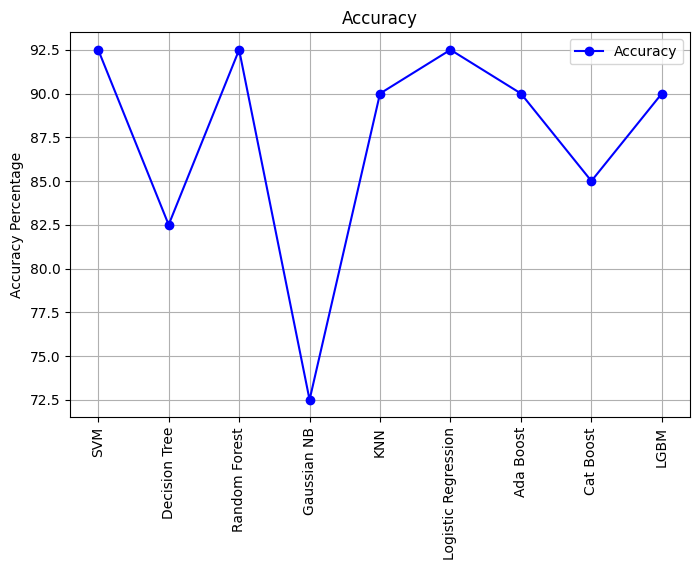

In [455]:
# Sample accuracy data
accuracy_values = [a1, a2, a3, a4, a5, a6, a7, a8, a9]

# Number of epochs
epochs = ["SVM", "Decision Tree", "Random Forest", "Gaussian NB", "KNN", "Logistic Regression", "Ada Boost", "Cat Boost", "LGBM"]

# Create a line graph
plt.figure(figsize = (8, 5))
plt.plot(epochs, accuracy_values, marker = 'o', linestyle = '-', color = 'b', label = 'Accuracy')
plt.title('Accuracy')
plt.ylabel('Accuracy Percentage')
plt.xticks(rotation = 90)
plt.xticks(epochs)  # Show epochs as x-axis ticks
plt.grid(True)
plt.legend()
plt.show()

# **Accuracy bar of Classifiers**

<BarContainer object of 9 artists>

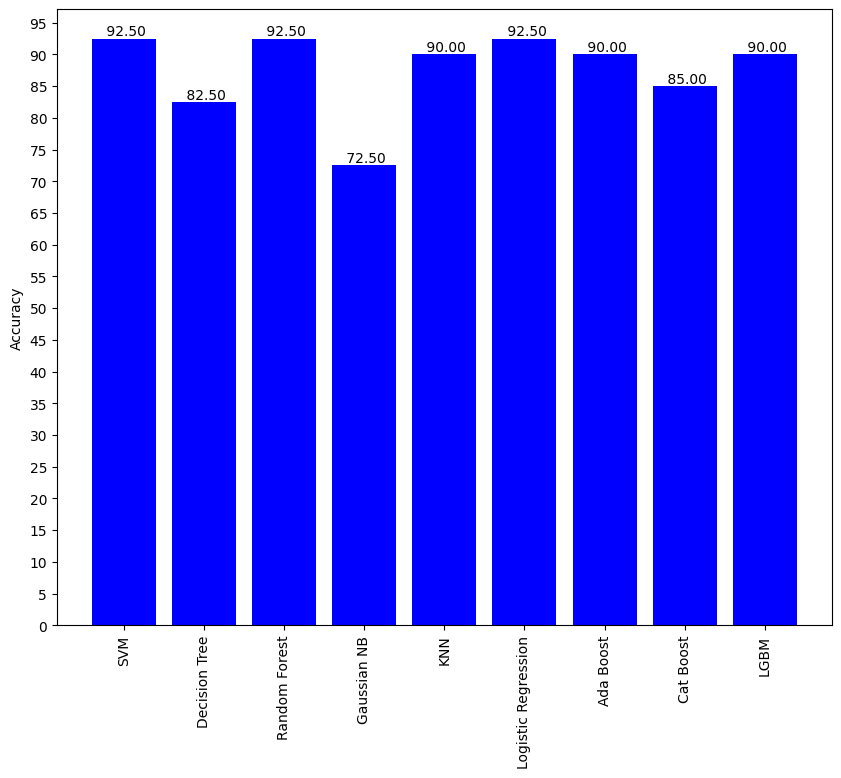

In [456]:
names = ["SVM", "Decision Tree", "Random Forest", "Gaussian NB", "KNN", "Logistic Regression", "Ada Boost", "Cat Boost", "LGBM"]

h = [a1, a2, a3, a4, a5, a6, a7, a8, a9]
w = [0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8]
plt.figure(figsize = (10, 8))
bars = plt.bar(names, h, color = 'blue', width = 0.8)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, yval, f'{yval : .2f}',
             va = 'bottom', ha = 'center', fontsize = 10, color = 'black')

plt.yticks(np.arange(0, 110, 5), np.arange(0, 110, 5))
plt.xticks(rotation = 90)
plt.ylabel('Accuracy')
plt.bar(names, h, width = w, color = 'blue')

# **Voting of two highest accuracy classifiers (SVM and LR)**

In [457]:
from sklearn.ensemble import VotingClassifier
from sklearn import model_selection

clf1 = SVC(probability = True)
clf2 = LogisticRegression(random_state = 1)

labels = ['SVC', 'LogisticRegression']

In [458]:
# voting classifier with hard voting classifier
voting_clf_hard = VotingClassifier(estimators = [(labels[0], clf1),
                                                 (labels[1], clf2)],
                                   voting='hard')

In [459]:
# voting classifier with soft voting classifier
voting_clf_soft = VotingClassifier(estimators = [(labels[0], clf1),
                                                 (labels[1], clf2)],
                                   voting='soft')

In [460]:
from sklearn.metrics import accuracy_score

voting_clf_hard.fit(x_train, y_train)
predictions_hard = voting_clf_hard.predict(x_test)
accuracy_hard = accuracy_score(y_test, predictions_hard) * 100
print("Accuracy of Hard Voting(SVM & LR):{: .2f}".format(accuracy_hard))

Accuracy of Hard Voting(SVM & LR): 95.00


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


In [461]:
from sklearn.metrics import accuracy_score
voting_clf_soft.fit(x_train, y_train)
predictions_soft = voting_clf_soft.predict(x_test)
accuracy_soft = accuracy_score(y_test, predictions_soft) * 100
print("Accuracy of Soft Voting(SVM & LR):{: .2f}".format(accuracy_soft))

Accuracy of Soft Voting(SVM & LR): 92.50


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


# **Accuracy Bar Chart of All classifier**

<BarContainer object of 11 artists>

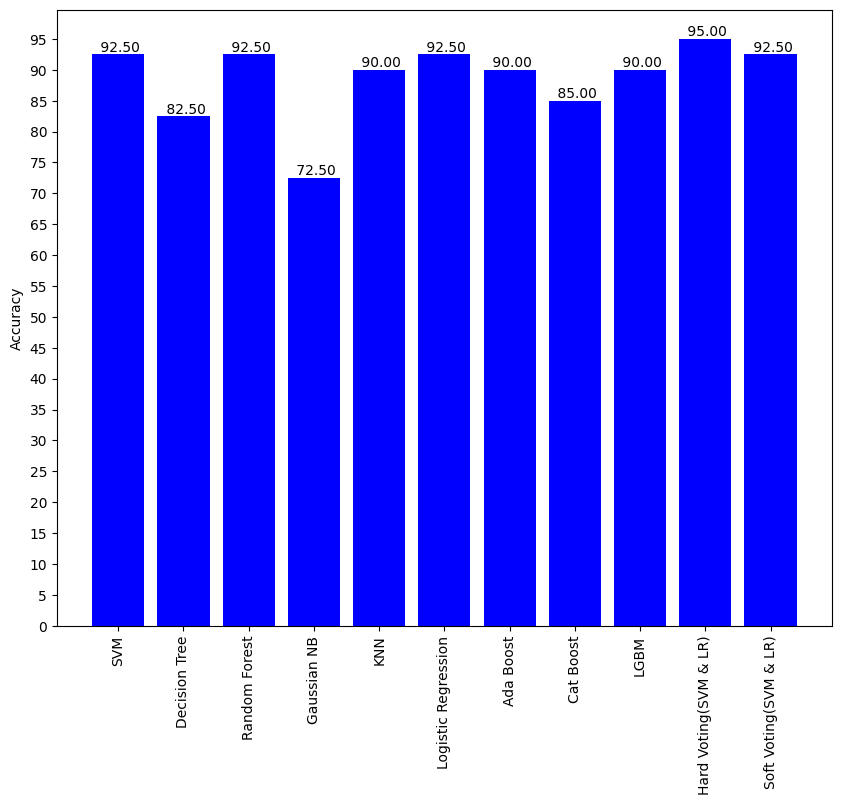

In [462]:
names = ["SVM", "Decision Tree", "Random Forest", "Gaussian NB", "KNN", "Logistic Regression", "Ada Boost", "Cat Boost", "LGBM", "Hard Voting(SVM & LR)", "Soft Voting(SVM & LR)"]
a10 = accuracy_hard
a11 = accuracy_soft

h = [a1, a2, a3, a4, a5, a6, a7, a8, a9, a10, a11]
w = [0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8]
plt.figure(figsize = (10, 8))
bars = plt.bar(names, h, color = 'blue', width = 0.8)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, yval, f'{yval : .2f}',
             va = 'bottom', ha = 'center', fontsize = 10, color = 'black')

plt.yticks(np.arange(0, 110, 5), np.arange(0, 110, 5))
plt.xticks(rotation = 90)
plt.ylabel('Accuracy')
plt.bar(names, h, width = w, color = 'blue')

# **Confusion Matrics**

In [463]:
#SVM
from sklearn.metrics import confusion_matrix
y_pred = model.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0, 0])
print('\nTrue Negatives(TN) = ', cm[1, 1])
print('\nFalse Positives(FP) = ', cm[0, 1])
print('\nFalse Negatives(FN) = ', cm[1, 0])

Confusion matrix

 [[19  2]
 [ 1 18]]

True Positives(TP) =  19

True Negatives(TN) =  18

False Positives(FP) =  2

False Negatives(FN) =  1


<Axes: title={'center': 'Support Vector Machine(SVM)'}>

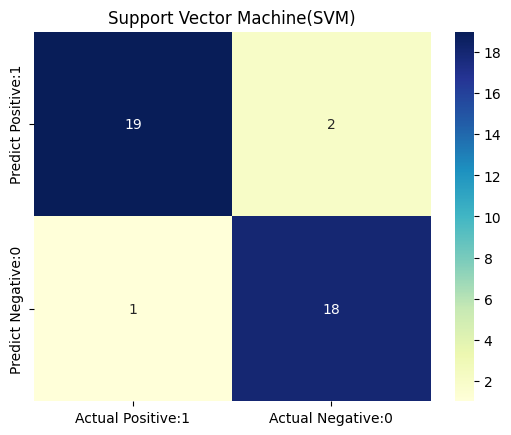

In [464]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data = cm, columns = ['Actual Positive:1', 'Actual Negative:0'],
                                 index = ['Predict Positive:1', 'Predict Negative:0'])
plt.title('Support Vector Machine(SVM)')
sns.heatmap(cm_matrix, annot = True, fmt = 'd', cmap = 'YlGnBu')

In [465]:
from sklearn.metrics import classification_report
y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.95      0.90      0.93        21
           2       0.90      0.95      0.92        19

    accuracy                           0.93        40
   macro avg       0.93      0.93      0.92        40
weighted avg       0.93      0.93      0.93        40



In [466]:
precision = cm[1, 1] / (cm[1, 1] + cm[0, 1])
recall = cm[1, 1] / (cm[1, 1] + cm[1, 0])
f1_score = 2 * (precision * recall) / (precision + recall)
specificity = cm[1, 1] / (cm[1, 1] + cm[0, 1])
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1-score: {:.2f}".format(f1_score))
print(f"Specificity: {specificity:.2f}")

Precision: 0.90
Recall: 0.95
F1-score: 0.92
Specificity: 0.90


In [467]:
# decision tree classifier
from sklearn.metrics import confusion_matrix
y_pred = model2.predict(x_test)
cm1 = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cm1)
print('\nTrue Positives(TP) = ', cm1[0, 0])
print('\nTrue Negatives(TN) = ', cm1[1, 1])
print('\nFalse Positives(FP) = ', cm1[0, 1])
print('\nFalse Negatives(FN) = ', cm1[1, 0])

Confusion matrix

 [[20  1]
 [ 6 13]]

True Positives(TP) =  20

True Negatives(TN) =  13

False Positives(FP) =  1

False Negatives(FN) =  6


<Axes: title={'center': 'Decision Tree(DTC)'}>

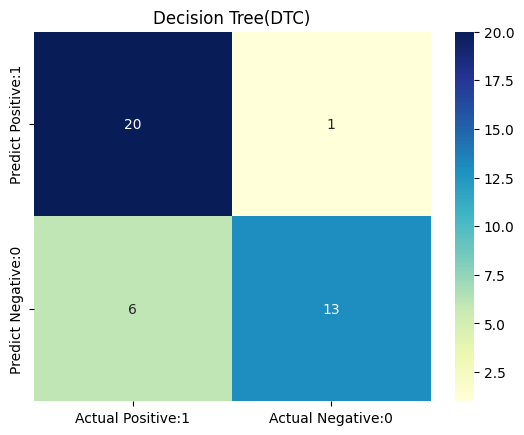

In [468]:
# visualize confusion matrix with seaborn heatmap

cm_matrix1 = pd.DataFrame(data = cm1, columns = ['Actual Positive:1', 'Actual Negative:0'],
                                 index = ['Predict Positive:1', 'Predict Negative:0'])
plt.title('Decision Tree(DTC)')
sns.heatmap(cm_matrix1, annot = True, fmt = 'd', cmap = 'YlGnBu')

In [469]:
y_pred = model2.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.77      0.95      0.85        21
           2       0.93      0.68      0.79        19

    accuracy                           0.82        40
   macro avg       0.85      0.82      0.82        40
weighted avg       0.84      0.82      0.82        40



In [470]:
precision1 = cm1[1, 1] / (cm1[1, 1] + cm1[0, 1])
recall1 = cm1[1, 1] / (cm1[1, 1] + cm1[1, 0])
f1_score1 = 2 * (precision1 * recall1) / (precision1 + recall1)
specificity1 = cm1[1, 1] / (cm1[1, 1] + cm1[0, 1])
print("Precision: {:.2f}".format(precision1))
print("Recall: {:.2f}".format(recall1))
print("F1-score: {:.2f}".format(f1_score1))
print(f"Specificity: {specificity1:.2f}")

Precision: 0.93
Recall: 0.68
F1-score: 0.79
Specificity: 0.93


In [471]:
# randomforest classifier
from sklearn.metrics import confusion_matrix
y_pred = model3.predict(x_test)
cm2 = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cm2)
print('\nTrue Positives(TP) = ', cm2[0, 0])
print('\nTrue Negatives(TN) = ', cm2[1, 1])
print('\nFalse Positives(FP) = ', cm2[0, 1])
print('\nFalse Negatives(FN) = ', cm2[1, 0])

Confusion matrix

 [[19  2]
 [ 1 18]]

True Positives(TP) =  19

True Negatives(TN) =  18

False Positives(FP) =  2

False Negatives(FN) =  1


<Axes: title={'center': 'Random Forest(RF)'}>

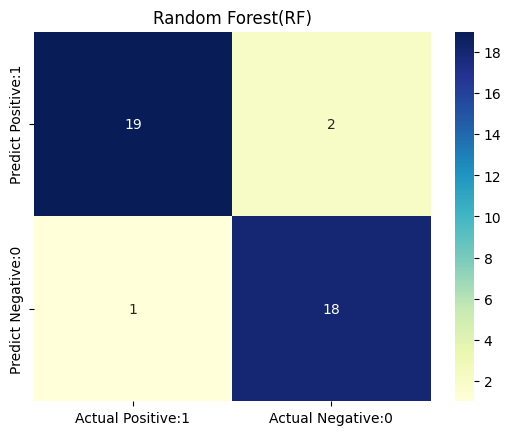

In [472]:
# visualize confusion matrix with seaborn heatmap

cm_matrix2 = pd.DataFrame(data = cm2, columns = ['Actual Positive:1', 'Actual Negative:0'],
                                 index = ['Predict Positive:1', 'Predict Negative:0'])
plt.title('Random Forest(RF)')
sns.heatmap(cm_matrix2, annot = True, fmt = 'd', cmap = 'YlGnBu')

In [473]:
y_pred = model3.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.95      0.90      0.93        21
           2       0.90      0.95      0.92        19

    accuracy                           0.93        40
   macro avg       0.93      0.93      0.92        40
weighted avg       0.93      0.93      0.93        40



In [474]:
precision2 = cm2[1, 1] / (cm2[1, 1] + cm2[0, 1])
recall2 = cm2[1, 1] / (cm2[1, 1] + cm2[1, 0])
f1_score2 = 2 * (precision2 * recall2) / (precision2 + recall2)
specificity2 = cm2[1, 1] / (cm2[1, 1] + cm2[0, 1])
print("Precision: {:.2f}".format(precision2))
print("Recall: {:.2f}".format(recall2))
print("F1-score: {:.2f}".format(f1_score2))
print(f"Specificity: {specificity2:.2f}")

Precision: 0.90
Recall: 0.95
F1-score: 0.92
Specificity: 0.90


In [475]:
#Naive Bayes Classifier
from sklearn.metrics import confusion_matrix
y_pred = model4.predict(x_test)
cm3 = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cm3)
print('\nTrue Positives(TP) = ', cm3[0, 0])
print('\nTrue Negatives(TN) = ', cm3[1, 1])
print('\nFalse Positives(FP) = ', cm3[0, 1])
print('\nFalse Negatives(FN) = ', cm3[1, 0])

Confusion matrix

 [[20  1]
 [10  9]]

True Positives(TP) =  20

True Negatives(TN) =  9

False Positives(FP) =  1

False Negatives(FN) =  10


<Axes: title={'center': 'Naive Bayes(NB)'}>

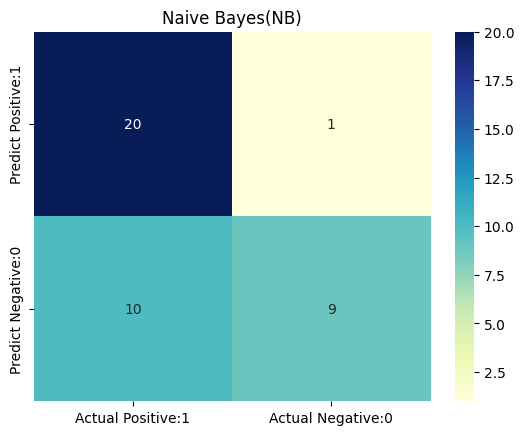

In [476]:
# visualize confusion matrix with seaborn heatmap

cm_matrix3 = pd.DataFrame(data = cm3, columns = ['Actual Positive:1', 'Actual Negative:0'],
                                 index = ['Predict Positive:1', 'Predict Negative:0'])
plt.title('Naive Bayes(NB)')
sns.heatmap(cm_matrix3, annot = True, fmt = 'd', cmap = 'YlGnBu')

In [477]:
y_pred = model4.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.67      0.95      0.78        21
           2       0.90      0.47      0.62        19

    accuracy                           0.72        40
   macro avg       0.78      0.71      0.70        40
weighted avg       0.78      0.72      0.71        40



In [478]:
precision3 = cm3[1, 1] / (cm3[1, 1] + cm3[0, 1])
recall3 = cm3[1, 1] / (cm3[1, 1] + cm3[1, 0])
f1_score3 = 2 * (precision3 * recall3) / (precision3 + recall3)
specificity3 = cm3[1, 1] / (cm3[1, 1] + cm3[0, 1])
print("Precision: {:.2f}".format(precision3))
print("Recall: {:.2f}".format(recall3))
print("F1-score: {:.2f}".format(f1_score3))
print(f"Specificity: {specificity3:.2f}")

Precision: 0.90
Recall: 0.47
F1-score: 0.62
Specificity: 0.90


In [479]:
#Knn Classifier
from sklearn.metrics import confusion_matrix
y_pred = model5.predict(x_test)
cm4 = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cm4)
print('\nTrue Positives(TP) = ', cm4[0, 0])
print('\nTrue Negatives(TN) = ', cm4[1, 1])
print('\nFalse Positives(FP) = ', cm4[0, 1])
print('\nFalse Negatives(FN) = ', cm4[1, 0])


Confusion matrix

 [[19  2]
 [ 2 17]]

True Positives(TP) =  19

True Negatives(TN) =  17

False Positives(FP) =  2

False Negatives(FN) =  2


<Axes: title={'center': 'K-nearest neighbors(KNN)'}>

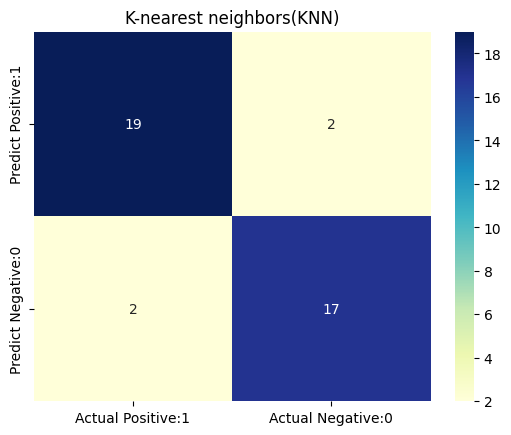

In [480]:
# visualize confusion matrix with seaborn heatmap

cm_matrix4 = pd.DataFrame(data = cm4, columns = ['Actual Positive:1', 'Actual Negative:0'],
                                 index = ['Predict Positive:1', 'Predict Negative:0'])
plt.title('K-nearest neighbors(KNN)')
sns.heatmap(cm_matrix4, annot = True, fmt = 'd', cmap = 'YlGnBu')

In [481]:
y_pred = model5.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.90      0.90      0.90        21
           2       0.89      0.89      0.89        19

    accuracy                           0.90        40
   macro avg       0.90      0.90      0.90        40
weighted avg       0.90      0.90      0.90        40



In [482]:
precision4 = cm4[1, 1] / (cm4[1, 1] + cm4[0, 1])
recall4 = cm4[1, 1] / (cm4[1, 1] + cm4[1, 0])
f1_score4 = 2 * (precision4 * recall4) / (precision4 + recall4)
specificity4 = cm4[1, 1] / (cm4[1, 1] + cm4[0, 1])
print("Precision: {:.2f}".format(precision4))
print("Recall: {:.2f}".format(recall4))
print("F1-score: {:.2f}".format(f1_score4))
print(f"Specificity: {specificity4:.2f}")

Precision: 0.89
Recall: 0.89
F1-score: 0.89
Specificity: 0.89


In [483]:
# logistic regression
from sklearn.metrics import confusion_matrix
y_pred = model6.predict(x_test)
cm5 = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cm5)
print('\nTrue Positives(TP) = ', cm5[0, 0])
print('\nTrue Negatives(TN) = ', cm5[1, 1])
print('\nFalse Positives(FP) = ', cm5[0, 1])
print('\nFalse Negatives(FN) = ', cm5[1, 0])

Confusion matrix

 [[19  2]
 [ 1 18]]

True Positives(TP) =  19

True Negatives(TN) =  18

False Positives(FP) =  2

False Negatives(FN) =  1


<Axes: title={'center': 'Logistic Regression(LR)'}>

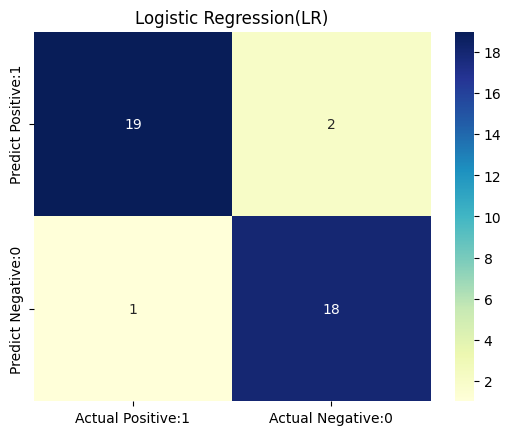

In [484]:
# visualize confusion matrix with seaborn heatmap

cm_matrix5 = pd.DataFrame(data = cm5, columns = ['Actual Positive:1', 'Actual Negative:0'],
                                 index = ['Predict Positive:1', 'Predict Negative:0'])
plt.title('Logistic Regression(LR)')
sns.heatmap(cm_matrix5, annot = True, fmt = 'd', cmap = 'YlGnBu')

In [485]:
y_pred = model6.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.95      0.90      0.93        21
           2       0.90      0.95      0.92        19

    accuracy                           0.93        40
   macro avg       0.93      0.93      0.92        40
weighted avg       0.93      0.93      0.93        40



In [486]:
precision5 = cm5[1, 1] / (cm5[1, 1] + cm5[0, 1])
recall5 = cm5[1, 1] / (cm5[1, 1] + cm5[1, 0])
f1_score5 = 2 * (precision5 * recall5) / (precision5 + recall5)
specificity5 = cm5[1, 1] / (cm5[1, 1] + cm5[0, 1])
print("Precision: {:.2f}".format(precision5))
print("Recall: {:.2f}".format(recall5))
print("F1-score: {:.2f}".format(f1_score5))
print(f"Specificity: {specificity5:.2f}")

Precision: 0.90
Recall: 0.95
F1-score: 0.92
Specificity: 0.90


In [487]:
# AdaBoostClassifier
from sklearn.metrics import confusion_matrix
y_pred = model7.predict(x_test)
cm6 = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cm6)
print('\nTrue Positives(TP) = ', cm6[0, 0])
print('\nTrue Negatives(TN) = ', cm6[1, 1])
print('\nFalse Positives(FP) = ', cm6[0, 1])
print('\nFalse Negatives(FN) = ', cm6[1, 0])

Confusion matrix

 [[21  0]
 [ 4 15]]

True Positives(TP) =  21

True Negatives(TN) =  15

False Positives(FP) =  0

False Negatives(FN) =  4


<Axes: title={'center': 'Ada Boost(AB)'}>

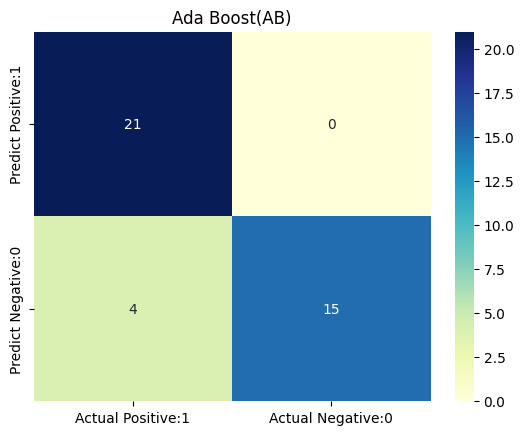

In [488]:
# visualize confusion matrix with seaborn heatmap

cm_matrix6 = pd.DataFrame(data = cm6, columns = ['Actual Positive:1', 'Actual Negative:0'],
                                 index = ['Predict Positive:1', 'Predict Negative:0'])
plt.title('Ada Boost(AB)')
sns.heatmap(cm_matrix6, annot = True, fmt = 'd', cmap = 'YlGnBu')

In [489]:
y_pred = model7.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.84      1.00      0.91        21
           2       1.00      0.79      0.88        19

    accuracy                           0.90        40
   macro avg       0.92      0.89      0.90        40
weighted avg       0.92      0.90      0.90        40



In [490]:
precision6 = cm6[1, 1] / (cm6[1, 1] + cm6[0, 1])
recall6 = cm6[1, 1] / (cm6[1, 1] + cm6[1, 0])
f1_score6 = 2 * (precision6 * recall6) / (precision6 + recall6)
specificity6 = cm6[1, 1] / (cm6[1, 1] + cm6[0, 1])
print("Precision: {:.2f}".format(precision6))
print("Recall: {:.2f}".format(recall6))
print("F1-score: {:.2f}".format(f1_score6))
print(f"Specificity: {specificity6:.2f}")

Precision: 1.00
Recall: 0.79
F1-score: 0.88
Specificity: 1.00


In [491]:
# CatBoostClassifier
from sklearn.metrics import confusion_matrix
y_pred = model8.predict(x_test)
cm7 = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cm7)
print('\nTrue Positives(TP) = ', cm7[0, 0])
print('\nTrue Negatives(TN) = ', cm7[1, 1])
print('\nFalse Positives(FP) = ', cm7[0, 1])
print('\nFalse Negatives(FN) = ', cm7[1, 0])

Confusion matrix

 [[19  2]
 [ 4 15]]

True Positives(TP) =  19

True Negatives(TN) =  15

False Positives(FP) =  2

False Negatives(FN) =  4


<Axes: title={'center': 'Cat Boost(CB)'}>

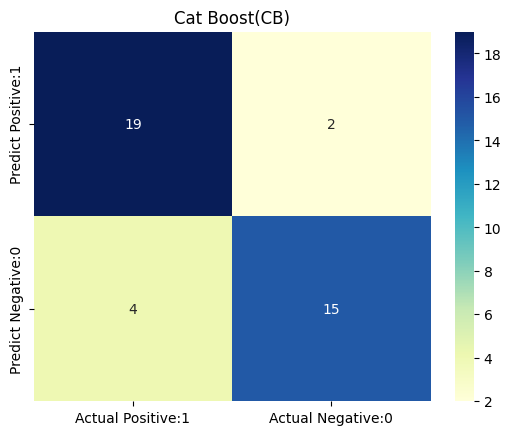

In [492]:
# visualize confusion matrix with seaborn heatmap

cm_matrix7 = pd.DataFrame(data = cm7, columns = ['Actual Positive:1', 'Actual Negative:0'],
                                 index = ['Predict Positive:1', 'Predict Negative:0'])
plt.title('Cat Boost(CB)')
sns.heatmap(cm_matrix7, annot = True, fmt = 'd', cmap = 'YlGnBu')

In [493]:
y_pred = model8.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.83      0.90      0.86        21
           2       0.88      0.79      0.83        19

    accuracy                           0.85        40
   macro avg       0.85      0.85      0.85        40
weighted avg       0.85      0.85      0.85        40



In [494]:
precision7 = cm7[1, 1] / (cm7[1, 1] + cm7[0, 1])
recall7 = cm7[1, 1] / (cm7[1, 1] + cm7[1, 0])
f1_score7 = 2 * (precision7 * recall7) / (precision7 + recall7)
specificity7 = cm7[1, 1] / (cm7[1, 1] + cm7[0, 1])
print("Precision: {:.2f}".format(precision7))
print("Recall: {:.2f}".format(recall7))
print("F1-score: {:.2f}".format(f1_score7))
print(f"Specificity: {specificity7:.2f}")

Precision: 0.88
Recall: 0.79
F1-score: 0.83
Specificity: 0.88


In [495]:
#LGBM
import lightgbm as lgb
clf = lgb.LGBMClassifier()
clf.fit(x_train, y_train)

[LightGBM] [Info] Number of positive: 80, number of negative: 78
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000073 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 314
[LightGBM] [Info] Number of data points in the train set: 158, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.506329 -> initscore=0.025318
[LightGBM] [Info] Start training from score 0.025318
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


LGBMClassifier()

In [496]:
# view confusion-matrix
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix
cm8 = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cm8)
print('\nTrue Positives(TP) = ', cm8[0, 0])
print('\nTrue Negatives(TN) = ', cm8[1, 1])
print('\nFalse Positives(FP) = ', cm8[0, 1])
print('\nFalse Negatives(FN) = ', cm8[1, 0])

Confusion matrix

 [[19  2]
 [ 4 15]]

True Positives(TP) =  19

True Negatives(TN) =  15

False Positives(FP) =  2

False Negatives(FN) =  4


<Axes: title={'center': 'LightGBM(LGBM)'}>

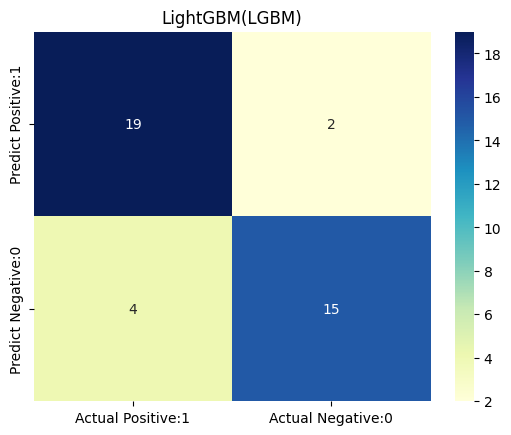

In [497]:
# visualize confusion matrix with seaborn heatmap

cm_matrix8 = pd.DataFrame(data = cm8, columns = ['Actual Positive:1', 'Actual Negative:0'],
                                 index = ['Predict Positive:1', 'Predict Negative:0'])
plt.title('LightGBM(LGBM)')
sns.heatmap(cm_matrix8, annot = True, fmt = 'd', cmap = 'YlGnBu')

In [498]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.83      0.90      0.86        21
           2       0.88      0.79      0.83        19

    accuracy                           0.85        40
   macro avg       0.85      0.85      0.85        40
weighted avg       0.85      0.85      0.85        40



In [499]:
precision8 = cm8[1, 1] / (cm8[1, 1] + cm8[0, 1])
recall8 = cm8[1, 1] / (cm8[1, 1] + cm8[1, 0])
f1_score8 = 2 * (precision8 * recall8) / (precision8 + recall8)
specificity8 = cm8[1, 1] / (cm8[1, 1] + cm8[0, 1])
print("Precision: {:.2f}".format(precision8))
print("Recall: {:.2f}".format(recall8))
print("F1-score: {:.2f}".format(f1_score8))
print(f"Specificity: {specificity8:.2f}")

Precision: 0.88
Recall: 0.79
F1-score: 0.83
Specificity: 0.88


In [500]:
#Hard Voting
from sklearn.metrics import confusion_matrix
voting_clf_hard.fit(x_train, y_train)
y_pred = voting_clf_hard.predict(x_test)
cm9 = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cm9)
print('\nTrue Positives(TP) = ', cm9[0, 0])
print('\nTrue Negatives(TN) = ', cm9[1, 1])
print('\nFalse Positives(FP) = ', cm9[0, 1])
print('\nFalse Negatives(FN) = ', cm9[1, 0])

Confusion matrix

 [[20  1]
 [ 1 18]]

True Positives(TP) =  20

True Negatives(TN) =  18

False Positives(FP) =  1

False Negatives(FN) =  1


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


<Axes: title={'center': 'Hard Voting (HB)'}>

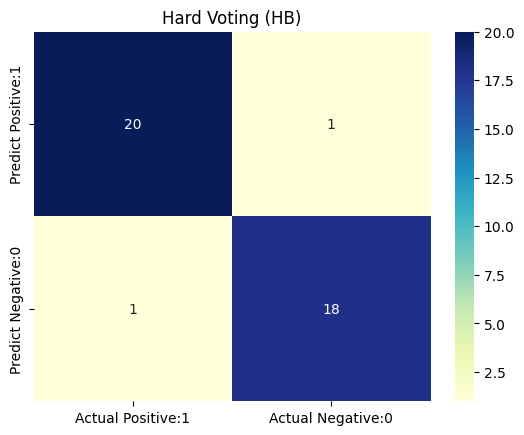

In [501]:
# visualize confusion matrix with seaborn heatmap

cm_matrix9 = pd.DataFrame(data = cm9, columns = ['Actual Positive:1', 'Actual Negative:0'],
                                 index = ['Predict Positive:1', 'Predict Negative:0'])
plt.title('Hard Voting (HB)')
sns.heatmap(cm_matrix9, annot = True, fmt = 'd', cmap = 'YlGnBu')

In [502]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.95      0.95      0.95        21
           2       0.95      0.95      0.95        19

    accuracy                           0.95        40
   macro avg       0.95      0.95      0.95        40
weighted avg       0.95      0.95      0.95        40



In [503]:
precision9 = cm9[1, 1] / (cm9[1, 1] + cm9[0, 1])
recall9 = cm9[1, 1] / (cm9[1, 1] + cm9[1, 0])
f1_score9 = 2 * (precision9 * recall9) / (precision9 + recall9)
specificity9 = cm9[1, 1] / (cm9[1, 1] + cm9[0, 1])
print("Precision: {:.2f}".format(precision9))
print("Recall: {:.2f}".format(recall9))
print("F1-score: {:.2f}".format(f1_score9))
print(f"Specificity: {specificity9:.2f}")

Precision: 0.95
Recall: 0.95
F1-score: 0.95
Specificity: 0.95


In [504]:
#Soft Voting
from sklearn.metrics import confusion_matrix
voting_clf_soft.fit(x_train, y_train)
y_pred = voting_clf_soft.predict(x_test)
cm10 = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cm10)
print('\nTrue Positives(TP) = ', cm10[0, 0])
print('\nTrue Negatives(TN) = ', cm10[1, 1])
print('\nFalse Positives(FP) = ', cm10[0, 1])
print('\nFalse Negatives(FN) = ', cm10[1, 0])

Confusion matrix

 [[19  2]
 [ 1 18]]

True Positives(TP) =  19

True Negatives(TN) =  18

False Positives(FP) =  2

False Negatives(FN) =  1


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


<Axes: title={'center': 'Soft Voting(SB)'}>

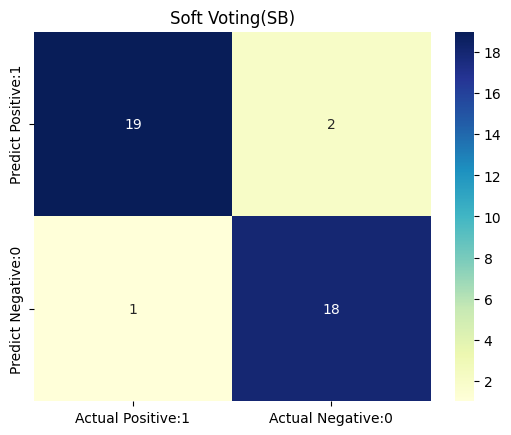

In [505]:
# visualize confusion matrix with seaborn heatmap

cm_matrix10 = pd.DataFrame(data = cm10, columns = ['Actual Positive:1', 'Actual Negative:0'],
                                 index = ['Predict Positive:1', 'Predict Negative:0'])
plt.title('Soft Voting(SB)')
sns.heatmap(cm_matrix10, annot = True, fmt = 'd', cmap = 'YlGnBu')

In [506]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.95      0.90      0.93        21
           2       0.90      0.95      0.92        19

    accuracy                           0.93        40
   macro avg       0.93      0.93      0.92        40
weighted avg       0.93      0.93      0.93        40



In [507]:
precision10 = cm10[1, 1] / (cm10[1, 1] + cm10[0, 1])
recall10 = cm10[1, 1] / (cm10[1, 1] + cm10[1, 0])
f1_score10 = 2 * (precision10 * recall10) / (precision10 + recall10)
specificity10 = cm10[1, 1] / (cm10[1, 1] + cm10[0, 1])
print("Precision: {:.2f}".format(precision10))
print("Recall: {:.2f}".format(recall10))
print("F1-score: {:.2f}".format(f1_score10))
print(f"Specificity: {specificity10:.2f}")

Precision: 0.90
Recall: 0.95
F1-score: 0.92
Specificity: 0.90


# **ROC Curve**

In [508]:
#SVM
r_probs = [0 for _ in range(len(y_test))]
svc_cls = SVC(probability = True, kernel = 'linear', C = 1.0)
svc_cls.fit(x_train, y_train)
svm_probs = svc_cls.predict_proba(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [509]:
svm_probs = svm_probs[:, 1]

In [510]:
from sklearn.metrics import roc_curve, roc_auc_score

In [511]:
r_auc = roc_auc_score(y_test, r_probs)
svm_auc = roc_auc_score(y_test, svm_probs)

In [512]:
print('Random (chance) Prediction: AUROC = %.3f' % (r_auc))
print('SVM: AUROC = %.3f' % (svm_auc))

Random (chance) Prediction: AUROC = 0.500
SVM: AUROC = 0.910


In [513]:
r_fpr, r_tpr, _ = roc_curve(y_test, r_probs, pos_label = 2)
svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_probs, pos_label = 2)

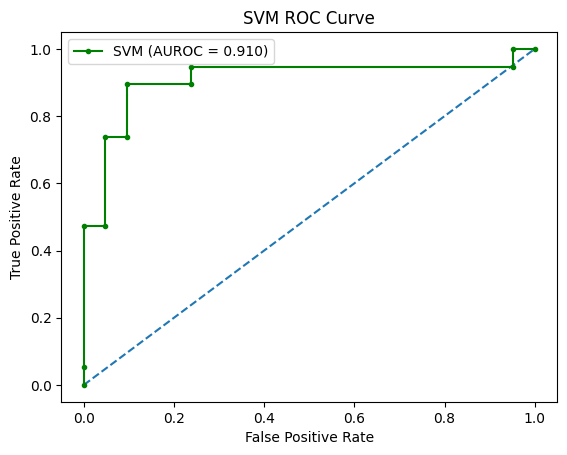

In [514]:
plt.plot(r_fpr, r_tpr, linestyle = '--')
plt.plot(svm_fpr, svm_tpr, marker = '.', color = 'green', label = 'SVM (AUROC = %0.3f)' % svm_auc)
# Title
plt.title('SVM ROC Curve')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() #
# Show plot
plt.show()

In [515]:
# Decision Tree
dtc_probs = model2.predict_proba(x_test)
dtc_probs = dtc_probs[:, 1]
dtc_auc = roc_auc_score(y_test, dtc_probs)


In [516]:
print('Random (chance) Prediction: AUROC = %.3f' % (r_auc))
print('Decision Tree: AUROC = %.3f' % (dtc_auc))

Random (chance) Prediction: AUROC = 0.500
Decision Tree: AUROC = 0.818


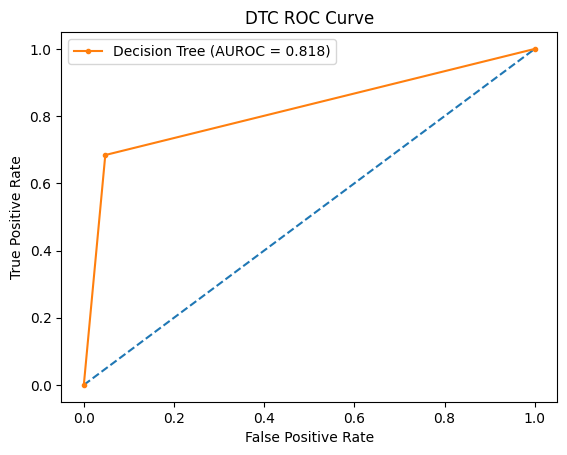

In [517]:
dtc_fpr, dtc_tpr, _ = roc_curve(y_test, dtc_probs, pos_label = 2)
plt.plot(r_fpr, r_tpr, linestyle = '--')
plt.plot(dtc_fpr, dtc_tpr, marker = '.', label = 'Decision Tree (AUROC = %0.3f)' % dtc_auc)
# Title
plt.title('DTC ROC Curve')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() #
# Show plot
plt.show()

In [518]:
# Random Forest
rf_probs = model3.predict_proba(x_test)
rf_probs = rf_probs[:, 1]
rf_auc = roc_auc_score(y_test, rf_probs)

In [519]:
print('Random (chance) Prediction: AUROC = %.3f' % (r_auc))
print('Random Forest: AUROC = %.3f' % (rf_auc))

Random (chance) Prediction: AUROC = 0.500
Random Forest: AUROC = 0.970


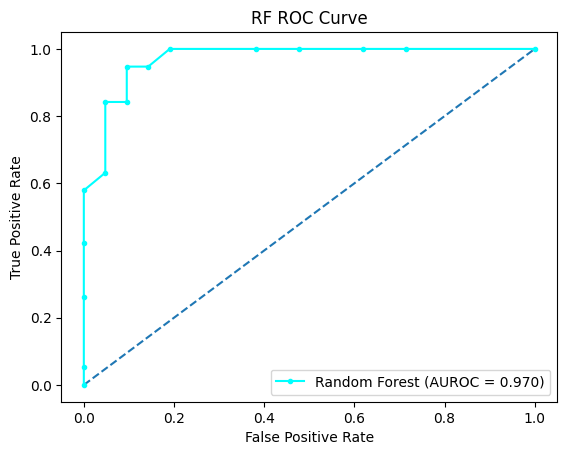

In [520]:
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs, pos_label = 2)
plt.plot(r_fpr, r_tpr, linestyle = '--')
plt.plot(rf_fpr, rf_tpr, marker = '.', color = 'cyan', label = 'Random Forest (AUROC = %0.3f)' % rf_auc)
# Title
plt.title('RF ROC Curve')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() #
# Show plot
plt.show()

In [521]:
# Naive Bayes
nb_probs = model4.predict_proba(x_test)
nb_probs = nb_probs[:, 1]
nb_auc = roc_auc_score(y_test, nb_probs)

In [522]:
print('Random (chance) Prediction: AUROC = %.3f' % (r_auc))
print('Naive Bayes: AUROC = %.3f' % (nb_auc))

Random (chance) Prediction: AUROC = 0.500
Naive Bayes: AUROC = 0.940


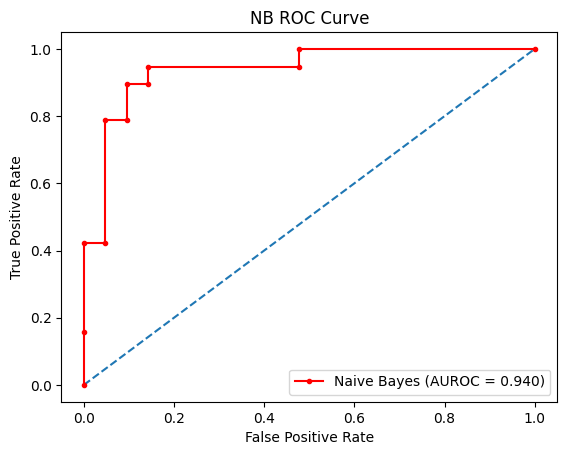

In [523]:
nb_fpr, nb_tpr, _ = roc_curve(y_test, nb_probs, pos_label = 2)
plt.plot(r_fpr, r_tpr, linestyle = '--')
plt.plot(nb_fpr, nb_tpr, marker = '.', color = 'red', label = 'Naive Bayes (AUROC = %0.3f)' % nb_auc)
# Title
plt.title('NB ROC Curve')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() #
# Show plot
plt.show()

In [524]:
#KNN
knn_probs = model5.predict_proba(x_test)
knn_probs = knn_probs[:, 1]
knn_auc = roc_auc_score(y_test, knn_probs)

In [525]:
print('Random (chance) Prediction: AUROC = %.3f' % (r_auc))
print('KNN: AUROC = %.3f' % (knn_auc))

Random (chance) Prediction: AUROC = 0.500
KNN: AUROC = 0.956


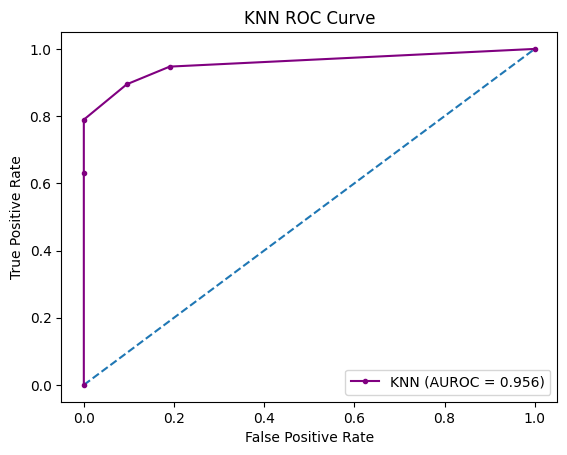

In [526]:
knn_fpr, knn_tpr, _ = roc_curve(y_test, knn_probs, pos_label = 2)
plt.plot(r_fpr, r_tpr, linestyle = '--')
plt.plot(knn_fpr, knn_tpr, marker = '.', color = 'purple', label = 'KNN (AUROC = %0.3f)' % knn_auc)
# Title
plt.title('KNN ROC Curve')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() #
# Show plot
plt.show()

In [527]:
# Logistic Regression
lr_probs = model6.predict_proba(x_test)
lr_probs = lr_probs[:, 1]
lr_auc = roc_auc_score(y_test, lr_probs)

In [528]:
print('Random (chance) Prediction: AUROC = %.3f' % (r_auc))
print('Logistic Regression: AUROC = %.3f' % (lr_auc))

Random (chance) Prediction: AUROC = 0.500
Logistic Regression: AUROC = 0.925


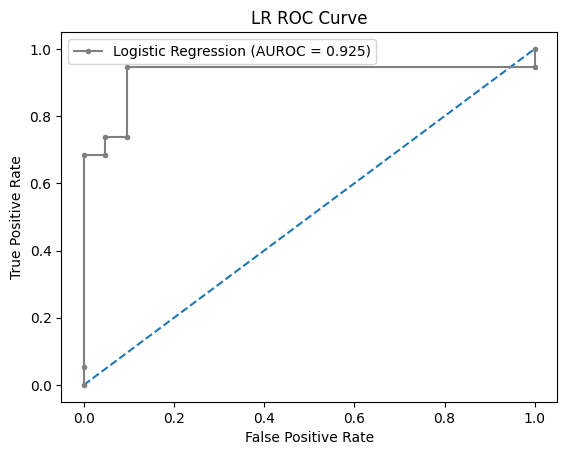

In [529]:
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs, pos_label = 2)
plt.plot(r_fpr, r_tpr, linestyle='--')
plt.plot(lr_fpr, lr_tpr, marker = '.', color = 'gray', label = 'Logistic Regression (AUROC = %0.3f)' % lr_auc)
# Title
plt.title('LR ROC Curve')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() #
# Show plot
plt.show()

In [530]:
# Ada Boost
ada_probs = model7.predict_proba(x_test)
ada_probs = ada_probs[:, 1]
ada_auc = roc_auc_score(y_test, ada_probs)

In [531]:
print('Random (chance) Prediction: AUROC = %.3f' % (r_auc))
print('Ada Boost: AUROC = %.3f' % (ada_auc))

Random (chance) Prediction: AUROC = 0.500
Ada Boost: AUROC = 0.935


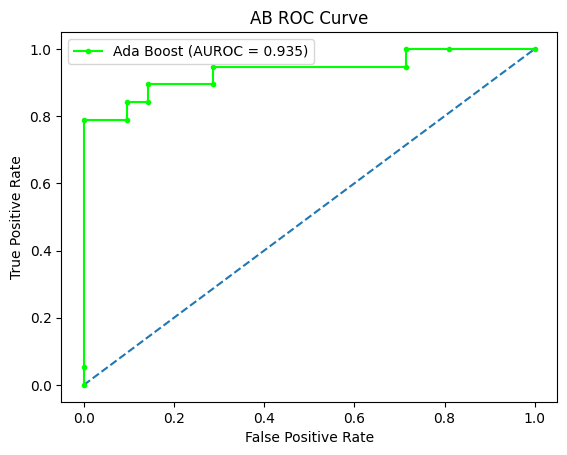

In [532]:
ada_fpr, ada_tpr, _ = roc_curve(y_test, ada_probs,  pos_label = 2)
plt.plot(r_fpr, r_tpr, linestyle = '--')
plt.plot(ada_fpr, ada_tpr, marker = '.', color = 'lime', label = 'Ada Boost (AUROC = %0.3f)' % ada_auc)
# Title
plt.title('AB ROC Curve')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() #
# Show plot
plt.show()

In [533]:
#Cat Boost
cat_probs = model8.predict_proba(x_test)
cat_probs = cat_probs[:, 1]
cat_auc = roc_auc_score(y_test, cat_probs)

In [534]:
print('Random (chance) Prediction: AUROC = %.3f' % (r_auc))
print('Cat Boost: AUROC = %.3f' % (cat_auc))

Random (chance) Prediction: AUROC = 0.500
Cat Boost: AUROC = 0.972


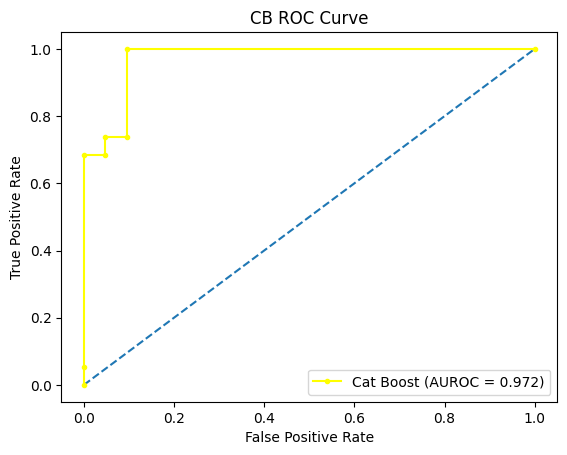

In [535]:
cat_fpr, cat_tpr, _ = roc_curve(y_test, cat_probs,  pos_label = 2)
plt.plot(r_fpr, r_tpr, linestyle = '--')
plt.plot(cat_fpr, cat_tpr, marker = '.', color = 'yellow', label = 'Cat Boost (AUROC = %0.3f)' % cat_auc)
# Title
plt.title('CB ROC Curve')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() #
# Show plot
plt.show()

In [536]:
# LGBM
lgbm_probs = model9.predict_proba(x_test)
lgbm_probs = lgbm_probs[:, 1]
lgbm_auc = roc_auc_score(y_test, lgbm_probs)

In [537]:
print('Random (chance) Prediction: AUROC = %.3f' % (r_auc))
print('LGBM: AUROC = %.3f' % (lgbm_auc))

Random (chance) Prediction: AUROC = 0.500
LGBM: AUROC = 0.965


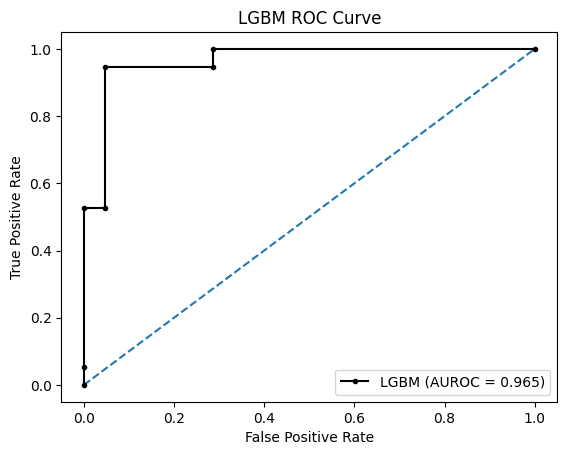

In [538]:
lgbm_fpr, lgbm_tpr, _ = roc_curve(y_test, lgbm_probs,  pos_label = 2)
plt.plot(r_fpr, r_tpr, linestyle = '--')
plt.plot(lgbm_fpr, lgbm_tpr, marker = '.', color = 'black', label = 'LGBM (AUROC = %0.3f)' % lgbm_auc)
# Title
plt.title('LGBM ROC Curve')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() #
# Show plot
plt.show()

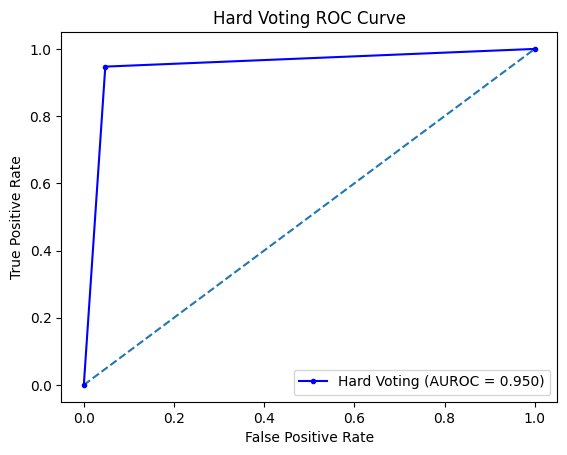

In [539]:
# Hard Voting
from sklearn.metrics import auc

# Convert y_test: 1 becomes 0, 2 becomes 1 for binary classification
y_test_binary = (y_test == 2).astype(int)

# Predict class labels using hard voting
hard_preds = voting_clf_hard.predict(x_test)

# Calculate ROC curve and AUC score for hard voting
fpr, tpr, thresholds = roc_curve(y_test_binary, hard_preds)
hard_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(r_fpr, r_tpr, linestyle = '--')
plt.plot(fpr, tpr, marker = '.', color = 'blue', label = 'Hard Voting (AUROC = %0.3f)' % hard_auc)
# Title
plt.title('Hard Voting ROC Curve')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() #
# Show plot
plt.show()

In [540]:
print('Random (chance) Prediction: AUROC = %.3f' % (r_auc))
print('Soft Voting: AUROC = %.3f' % (hard_auc))

Random (chance) Prediction: AUROC = 0.500
Soft Voting: AUROC = 0.950


In [541]:
# Soft Voting
soft_probs = voting_clf_soft.predict_proba(x_test)
soft_probs = soft_probs[:, 1]
soft_auc = roc_auc_score(y_test, soft_probs)

In [542]:
print('Random (chance) Prediction: AUROC = %.3f' % (r_auc))
print('Soft Voting: AUROC = %.3f' % (soft_auc))

Random (chance) Prediction: AUROC = 0.500
Soft Voting: AUROC = 0.985


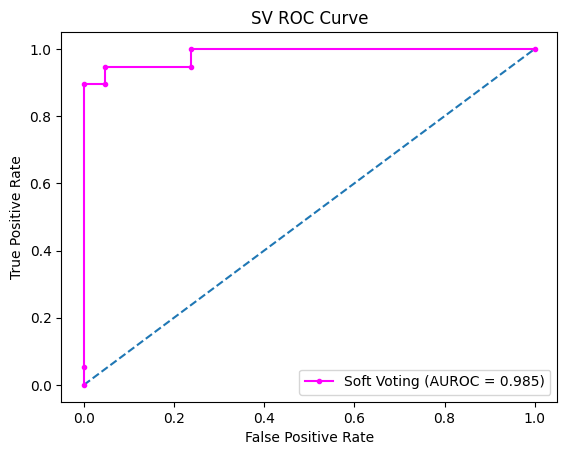

In [543]:
soft_fpr, soft_tpr, _ = roc_curve(y_test, soft_probs, pos_label = 2)
plt.plot(r_fpr, r_tpr, linestyle = '--')
plt.plot(soft_fpr, soft_tpr, marker = '.', color = 'magenta', label = 'Soft Voting (AUROC = %0.3f)' % soft_auc)
# Title
plt.title('SV ROC Curve')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() #
# Show plot
plt.show()

In [544]:
svc_cls = SVC(probability = True, kernel = 'linear', C = 1.0)
svc_cls.fit(x_train, y_train)
svm_probs = svc_cls.predict_proba(x_test)
dtc_probs = model2.predict_proba(x_test)
rf_probs = model3.predict_proba(x_test)
nb_probs = model4.predict_proba(x_test)
knn_probs = model5.predict_proba(x_test)
lr_probs = model6.predict_proba(x_test)
ada_probs = model7.predict_proba(x_test)
cat_probs = model8.predict_proba(x_test)
lgbm_probs = model9.predict_proba(x_test)
soft_probs = voting_clf_soft.predict_proba(x_test)
hard_probs = voting_clf_hard.predict(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [545]:
svm_probs = svm_probs[:, 1]
dtc_probs = dtc_probs[:, 1]
rf_probs = rf_probs[:, 1]
nb_probs = nb_probs[:, 1]
knn_probs = knn_probs[:, 1]
lr_probs = lr_probs[:, 1]
ada_probs = ada_probs[:, 1]
cat_probs = cat_probs[:, 1]
lgbm_probs = lgbm_probs[:, 1]
soft_probs = soft_probs[:, 1]

In [546]:
from sklearn.metrics import roc_curve, roc_auc_score

In [547]:
svm_auc = roc_auc_score(y_test, svm_probs)
dtc_auc = roc_auc_score(y_test, dtc_probs)
rf_auc = roc_auc_score(y_test, rf_probs)
nb_auc = roc_auc_score(y_test, nb_probs)
knn_auc = roc_auc_score(y_test, knn_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
ada_auc = roc_auc_score(y_test, ada_probs)
cat_auc = roc_auc_score(y_test, cat_probs)
lgbm_auc = roc_auc_score(y_test, lgbm_probs)
soft_auc = roc_auc_score(y_test, soft_probs)
hard_auc = roc_auc_score(y_test, hard_probs)

In [548]:
print('SVM: AUROC = %.3f' % (svm_auc))
print('Decision Tree: AUROC = %.3f' % (dtc_auc))
print('Random Forest: AUROC = %.3f' % (rf_auc))
print('Naive Bayes: AUROC = %.3f' % (nb_auc))
print('KNN: AUROC = %.3f' % (knn_auc))
print('Logistic Regression: AUROC = %.3f' % (lr_auc))
print('Ada Boost: AUROC = %.3f' % (ada_auc))
print('Cat Boost: AUROC = %.3f' % (cat_auc))
print('LGBM: AUROC = %.3f' % (lgbm_auc))
print('Soft Voting: AUROC = %.3f' % (soft_auc))
print('Hard Voting: AUROC = %.3f' % (hard_auc))

SVM: AUROC = 0.910
Decision Tree: AUROC = 0.818
Random Forest: AUROC = 0.970
Naive Bayes: AUROC = 0.940
KNN: AUROC = 0.956
Logistic Regression: AUROC = 0.925
Ada Boost: AUROC = 0.935
Cat Boost: AUROC = 0.972
LGBM: AUROC = 0.965
Soft Voting: AUROC = 0.985
Hard Voting: AUROC = 0.950


In [549]:
svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_probs, pos_label = 2)
dtc_fpr, dtc_tpr, _ = roc_curve(y_test, dtc_probs, pos_label = 2)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs, pos_label = 2)
nb_fpr, nb_tpr, _ = roc_curve(y_test, nb_probs, pos_label = 2)
knn_fpr, knn_tpr, _ = roc_curve(y_test, knn_probs, pos_label = 2)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs, pos_label = 2)
ada_fpr, ada_tpr, _ = roc_curve(y_test, ada_probs, pos_label = 2)
cat_fpr, cat_tpr, _ = roc_curve(y_test, cat_probs, pos_label = 2)
lgbm_fpr, lgbm_tpr, _ = roc_curve(y_test, lgbm_probs, pos_label = 2)
soft_fpr, soft_tpr, _ = roc_curve(y_test, soft_probs, pos_label = 2)
hard_fpr, hard_tpr, _ = roc_curve(y_test, hard_probs, pos_label = 2)

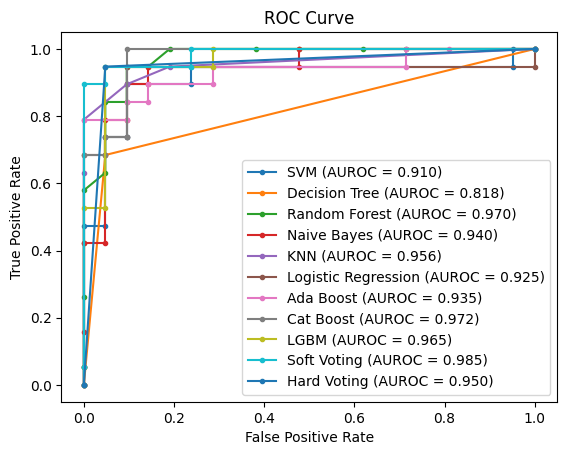

In [550]:
plt.plot(svm_fpr, svm_tpr, marker = '.', label = 'SVM (AUROC = %0.3f)' % svm_auc)
plt.plot(dtc_fpr, dtc_tpr, marker = '.', label = 'Decision Tree (AUROC = %0.3f)' % dtc_auc)
plt.plot(rf_fpr, rf_tpr, marker = '.', label = 'Random Forest (AUROC = %0.3f)' % rf_auc)
plt.plot(nb_fpr, nb_tpr, marker = '.', label = 'Naive Bayes (AUROC = %0.3f)' % nb_auc)
plt.plot(knn_fpr, knn_tpr, marker = '.', label = 'KNN (AUROC = %0.3f)' % knn_auc)
plt.plot(lr_fpr, lr_tpr, marker = '.', label = 'Logistic Regression (AUROC = %0.3f)' % lr_auc)
plt.plot(ada_fpr, ada_tpr, marker = '.', label = 'Ada Boost (AUROC = %0.3f)' % ada_auc)
plt.plot(cat_fpr, cat_tpr, marker = '.', label = 'Cat Boost (AUROC = %0.3f)' % cat_auc)
plt.plot(lgbm_fpr, lgbm_tpr, marker = '.', label = 'LGBM (AUROC = %0.3f)' % lgbm_auc)
plt.plot(soft_fpr, soft_tpr, marker = '.', label = 'Soft Voting (AUROC = %0.3f)' % soft_auc)
plt.plot(hard_fpr, hard_tpr, marker = '.', label = 'Hard Voting (AUROC = %0.3f)' % hard_auc)

# Title
plt.title('ROC Curve')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() #
# Show plot
plt.show()

# **SHAP**

In [551]:
pip install shap

  0%|          | 0/40 [00:00<?, ?it/s]

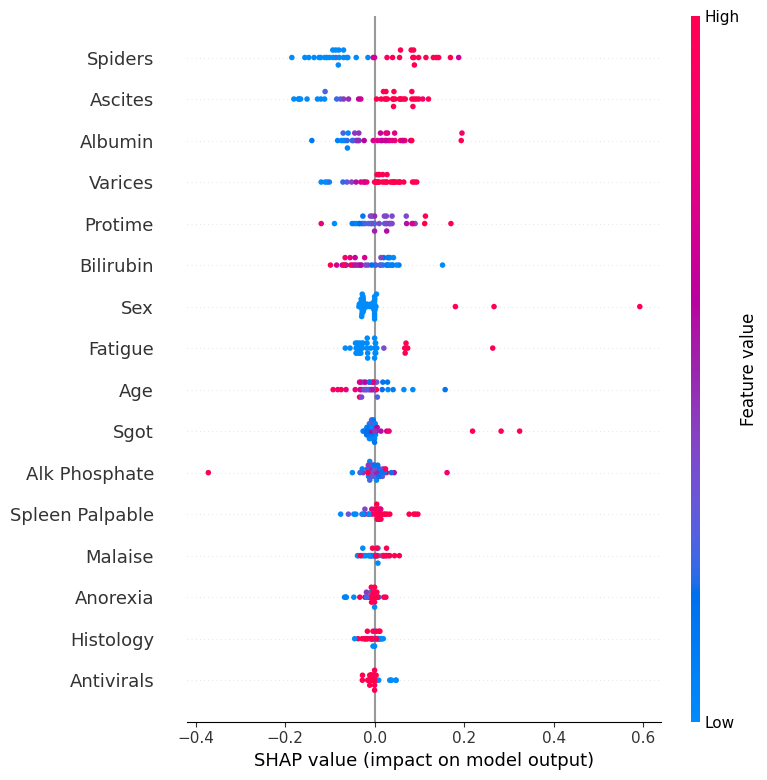

In [552]:
import shap
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# SHAP for SVM
explainer_svm = shap.KernelExplainer(model.predict, x_train)
shap_values_svm = explainer_svm.shap_values(x_test)

# Plot SHAP values for SVM
shap.summary_plot(shap_values_svm, x_test, feature_names=features)


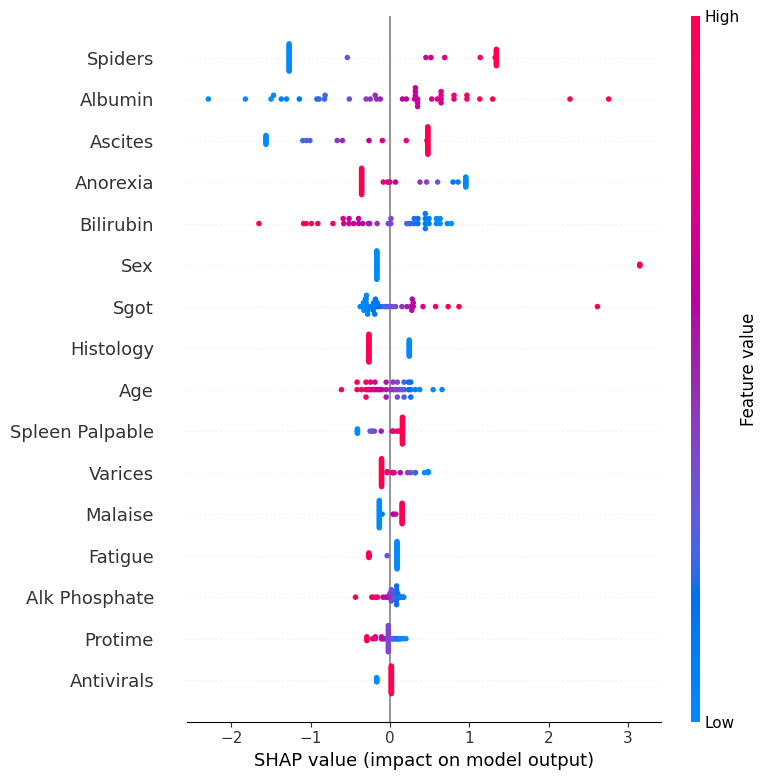

In [553]:
# SHAP for Logistic Regression
explainer_lr = shap.LinearExplainer(model6, x_train)
shap_values_lr = explainer_lr.shap_values(x_test)

# Plot SHAP values for Logistic Regression
shap.summary_plot(shap_values_lr, x_test, feature_names=features)


  0%|          | 0/40 [00:00<?, ?it/s]

SHAP for SVM in Voting Classifier


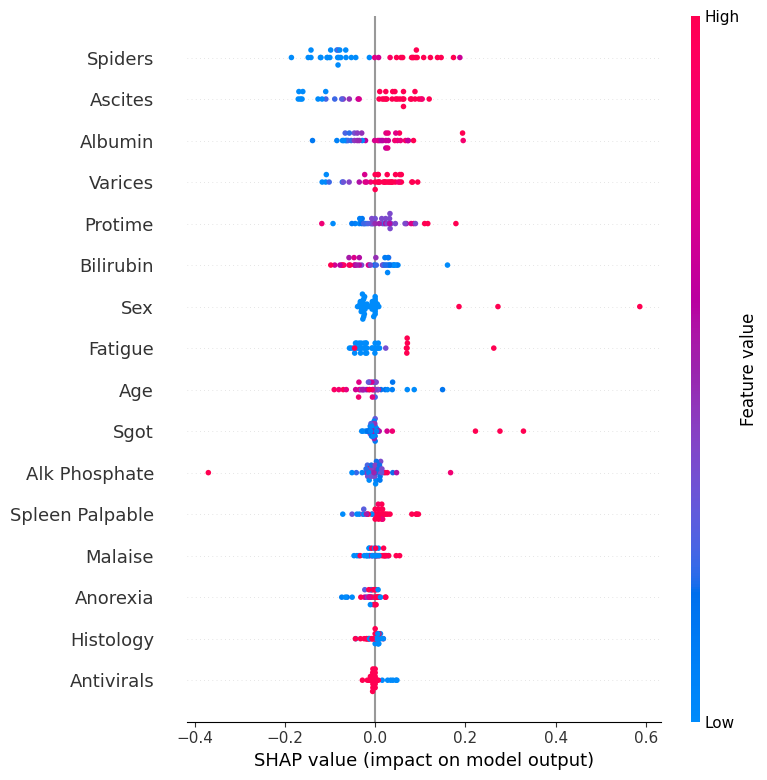

SHAP for Logistic Regression in Voting Classifier


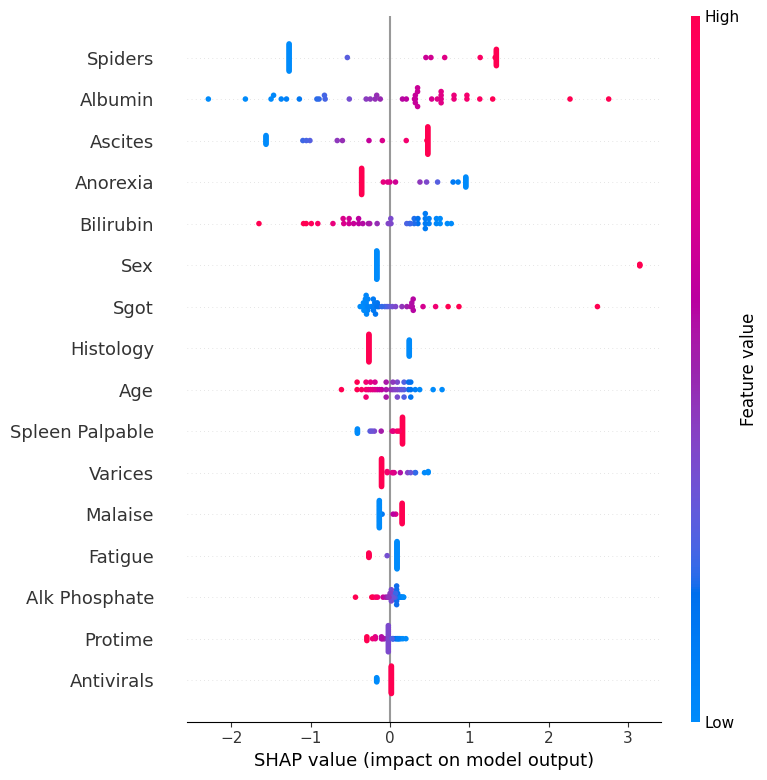

In [554]:
# SHAP for Voting Classifier (component models)

# SHAP for SVM within Voting Classifier
explainer_voting_svm = shap.KernelExplainer(voting_clf_hard.named_estimators_['SVC'].predict, x_train)
shap_values_voting_svm = explainer_voting_svm.shap_values(x_test)

# SHAP for Logistic Regression within Voting Classifier
explainer_voting_lr = shap.LinearExplainer(voting_clf_hard.named_estimators_['LogisticRegression'], x_train)
shap_values_voting_lr = explainer_voting_lr.shap_values(x_test)

# Plot SHAP values for Voting Classifier's components
print("SHAP for SVM in Voting Classifier")
shap.summary_plot(shap_values_voting_svm, x_test, feature_names=features)

print("SHAP for Logistic Regression in Voting Classifier")
shap.summary_plot(shap_values_voting_lr, x_test, feature_names=features)


  0%|          | 0/40 [00:00<?, ?it/s]

SHAP for the Voting Classifier


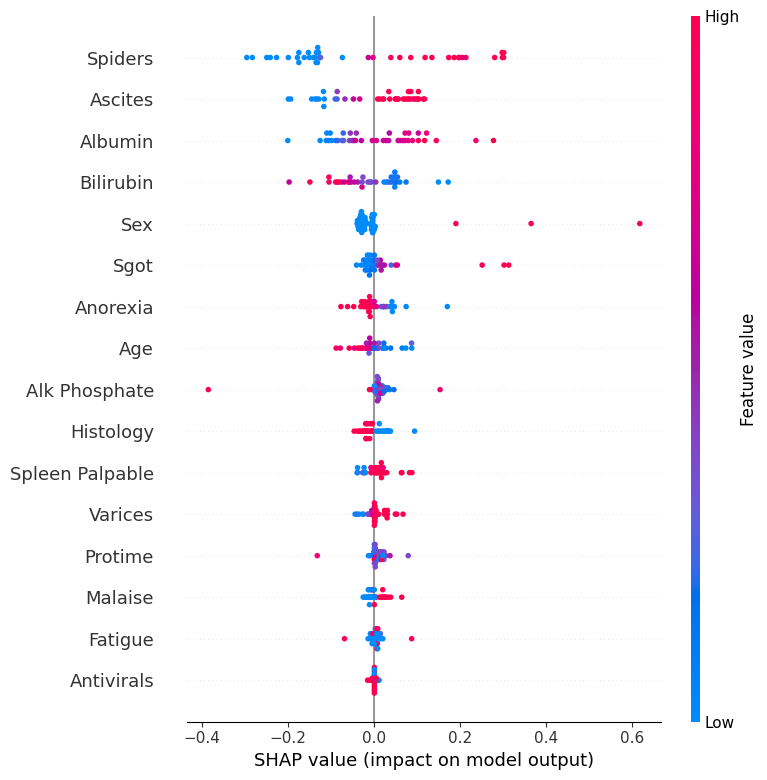

In [555]:
# Import necessary libraries
import shap

# SHAP for the overall Voting Classifier

# Create a SHAP explainer for the entire voting classifier
explainer_voting = shap.KernelExplainer(voting_clf_hard.predict, x_train)

# Get SHAP values for the predictions of the voting classifier
shap_values_voting = explainer_voting.shap_values(x_test)

# Plot SHAP values for the overall Voting Classifier
print("SHAP for the Voting Classifier")
shap.summary_plot(shap_values_voting, x_test, feature_names=features)

# Visualize SHAP values for a single prediction (force plot)
shap.initjs()
shap.force_plot(explainer_voting.expected_value, shap_values_voting[0], x_test[0], feature_names=features)


# **LIME**

In [556]:
pip install lime

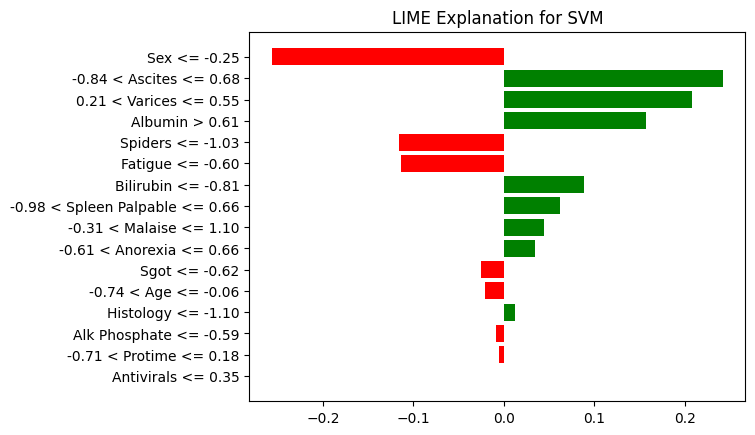

In [557]:
# Import necessary libraries
import lime
from lime.lime_tabular import LimeTabularExplainer

# LIME for SVM
explainer_svm = lime.lime_tabular.LimeTabularExplainer(
    training_data = x_train,
    feature_names = features,
    class_names = ['Die', 'Live'],
    mode = 'classification'
)

# Select an instance to explain from the test set
i = 0  # Change this index to explain different instances
test_instance = x_test[i]

# Generate explanation for SVM
exp_svm = explainer_svm.explain_instance(
    data_row = test_instance,
    predict_fn = model.predict_proba,
    num_features = 16
)

# Display explanation for SVM as a figure
fig_svm = exp_svm.as_pyplot_figure()
plt.title("LIME Explanation for SVM")
plt.show()

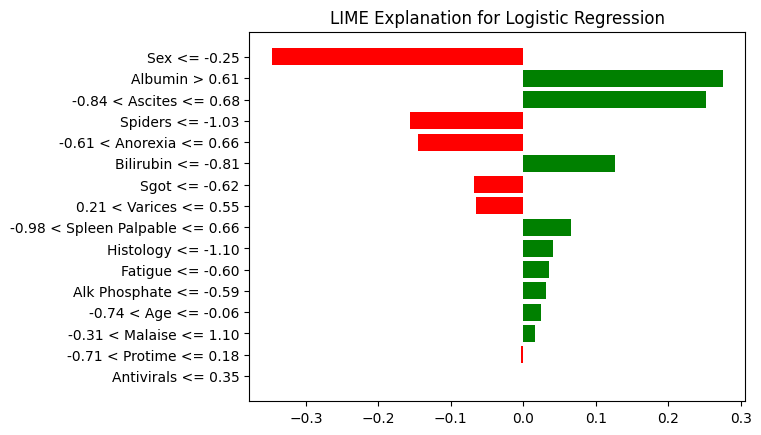

In [558]:
# LIME for Logistic Regression
explainer_lr = lime.lime_tabular.LimeTabularExplainer(
    training_data = x_train,
    feature_names = features,
    class_names = ['Die', 'Live'],
    mode = 'classification'
)

# Generate explanation for Logistic Regression
exp_lr = explainer_lr.explain_instance(
    data_row = test_instance,
    predict_fn = model6.predict_proba,
    num_features = 16
)

# Display explanation for Logistic Regression as a figure
fig_lr = exp_lr.as_pyplot_figure()
plt.title("LIME Explanation for Logistic Regression")
plt.show()


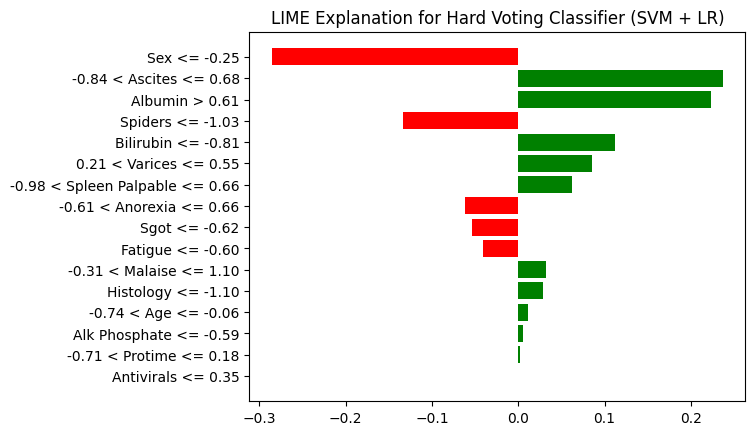

In [559]:
# Create custom predict_proba for LIME using averaged probabilities of SVM and LR
def custom_predict_proba(X):
    # Get probabilities from each model
    svm_proba = model.predict_proba(X)
    lr_proba = model6.predict_proba(X)
    # Average probabilities
    avg_proba = (svm_proba + lr_proba) / 2
    return avg_proba

# LIME explainer setup
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data = x_train,
    feature_names = features,
    class_names = ['Die', 'Live'],
    mode = 'classification'
)

# Choose an instance from the test set for explanation
i = 0  # Index of the instance to explain
test_instance = x_test[i]

# Generate LIME explanation for the chosen instance
exp = explainer.explain_instance(
    data_row = test_instance,
    predict_fn = custom_predict_proba,  # Using custom predict_proba from averaged SVM and LR
    num_features = 16
)

# Plot the explanation
fig = exp.as_pyplot_figure()
plt.title("LIME Explanation for Hard Voting Classifier (SVM + LR)")
plt.show()


# **------------------------------------------THE END------------------------------------------**